### Student Information
Name: 王妤瑄

Student ID: 110102042

GitHub ID: bbswei

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [135]:
!pip install PAMI Umap


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [136]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


## 1. Data Preparation

In [137]:
### Begin Assignment Here
df = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')
df.columns = [c.lower().strip() for c in df.columns]
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


可以看到 downvotes 和 upvote_ratio 的資料嚴重缺失

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [139]:
df.subreddit.unique()

array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

## 2. EDA

### 2.1 Get familiar with data

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

Sentiment 和 Label 兩標籤有不一致的情況，所以接下來的動作是為了選取一個較具有代表性的指標
（從下面可以看到有超過一半都是不一致的）

In [141]:
(df['sentiment'] == df['label']).value_counts(normalize=True)

False    0.540732
True     0.459268
Name: proportion, dtype: float64

可能因為Sentiment是直接由Polarity轉換的，所以數量一致。

Text(0, 0.5, 'Count')

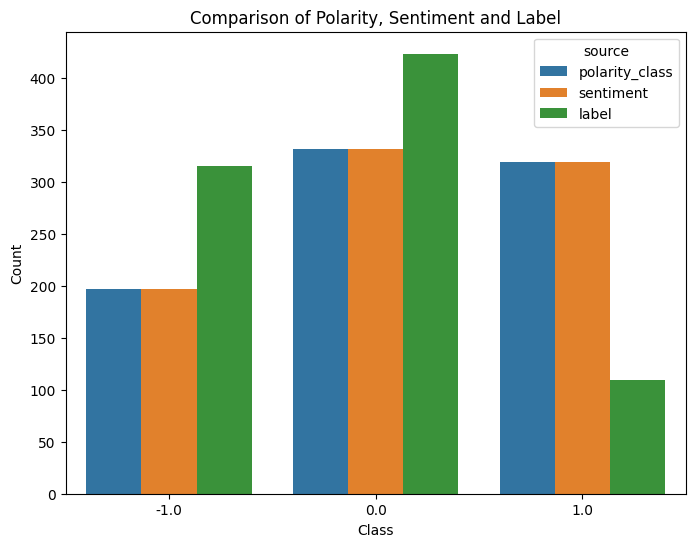

In [142]:
df['polarity_class'] = df['polarity'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_long = pd.melt(
    df,
    value_vars=['polarity_class','sentiment', 'label'],
    var_name='source',
    value_name='class')

plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='source', data=df_long)
plt.title("Comparison of Polarity, Sentiment and Label")
plt.xlabel("Class")
plt.ylabel("Count")

從下圖可以看到，兩標籤差異甚大，會影響我們對資料集的解讀。因為Sentiment跟Polarity分數對應，所以本次作業採用Sentiment作爲標籤

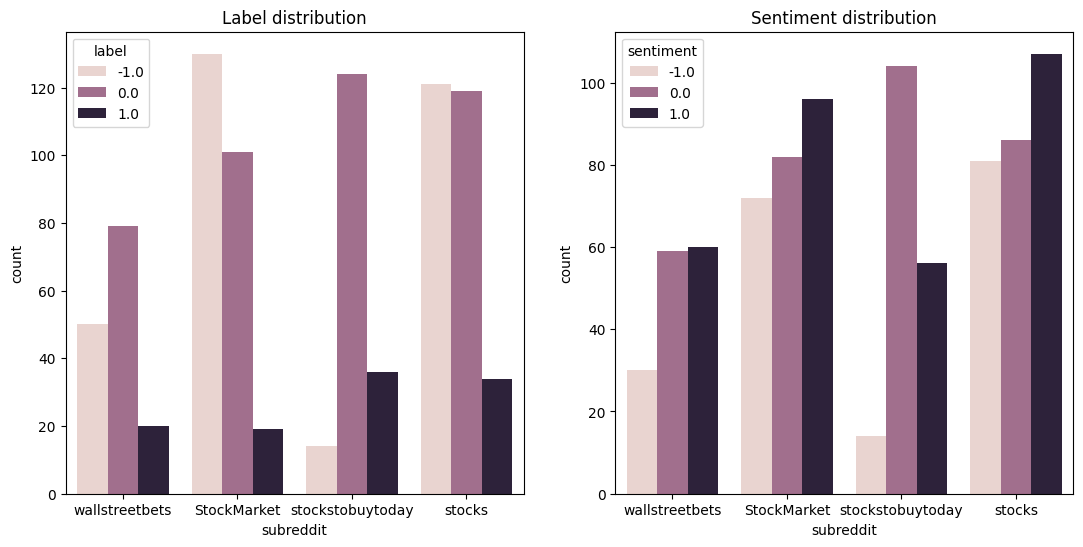

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(13,6)) 

# (1) 不同 subreddit 下，各 label 的數量
sns.countplot(x="subreddit", data=df, hue="label", ax=axes[0])
axes[0].set_title("Label distribution")
axes[0].tick_params(axis='x')

# (2) 不同 subreddit 下，各 sentiment 的數量
sns.countplot(x="subreddit", data=df, hue="sentiment", ax=axes[1])
axes[1].set_title("Sentiment distribution")
axes[1].tick_params(axis='x')

分析類別分布

In [144]:
df['subreddit'].value_counts()

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

稍微不均勻

<Axes: xlabel='subreddit', ylabel='count'>

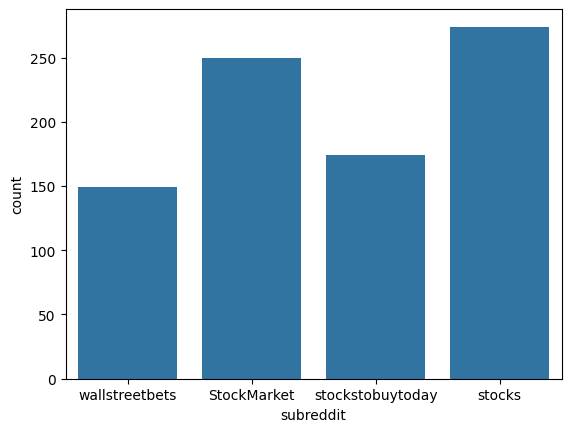

In [145]:
sns.countplot(x="subreddit", data=df)

情感標籤也稍微不均勻

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

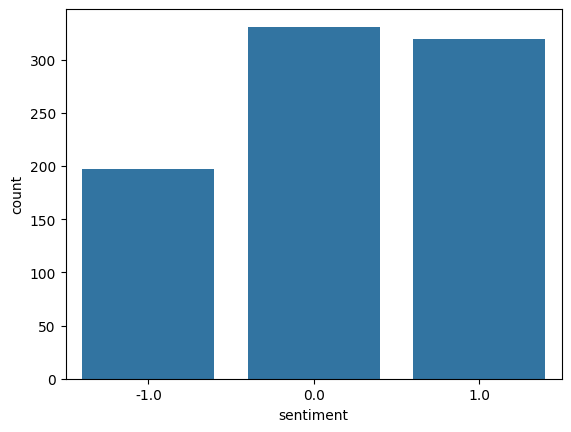

In [146]:
print(df['sentiment'].value_counts())
sns.countplot(x="sentiment", data=df) 

分析熱門文章（評論越多代表可能受到越多討論）

In [147]:
df['title'].value_counts().head(10)

title
Weekend Discussion Thread for the Weekend of April 11, 2025                                                                               51
r/Stocks Daily Discussion & Fundamentals Friday Apr 11, 2025                                                                              50
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?    46
Data Shows US Allies—Not China—Dumping Treasuries                                                                                         44
It's fucking awful seeing the "Silver" misinformation campaign everywhere I look                                                          41
The Trump administration is begging Xi Jinping to call Trump quickly.                                                                     40
$ U.S. dollar value (crashing)                                                                                                            37
BREAKIN

In [148]:
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]
sentiment_dist = df_top.groupby(['title','sentiment']).size().unstack(fill_value=0)
sentiment_dist = sentiment_dist.loc[sentiment_dist.sum(axis=1).sort_values(ascending=False).index]
print(sentiment_dist)

sentiment                                           -1.0   0.0   1.0
title                                                               
Weekend Discussion Thread for the Weekend of Ap...     8    17    26
r/Stocks Daily Discussion & Fundamentals Friday...    10    26    14
How do you feel about a sitting president makin...    14    14    18
Data Shows US Allies—Not China—Dumping Treasuries      9    17    18
It's fucking awful seeing the "Silver" misinfor...    20     9    12
The Trump administration is begging Xi Jinping ...    16    14    10
$ U.S. dollar value (crashing)                         9    14    14
BREAKING: China raises tariffs on U.S. goods to...     6    13    18
PRESIDENT TRUMP JUST ASKED THE SUPREME COURT FO...    15    10    11
Retail giant TARGET has now declined for 10 con...     7    12    12


In [149]:
# 取 upvotes 最高的
top5 = df.sort_values(by="upvotes", ascending=False).head(5)

for i, row in top5.iterrows():
    print(f"Example {i}")
    print(f"Upvotes: {row['upvotes']}")
    print(f"Sentiment: {row['sentiment']}")
    print(f"Polarity: {row['polarity']:.3f}, Subjectivity: {row['subjectivity']:.3f}")
    print("Text:")
    print(row['text'])
    print("="*80)

Example 42
Upvotes: 3943
Sentiment: -1.0
Polarity: -0.700, Subjectivity: 0.667
Text:
So they went from saying redditors are bad for manipulating the market o praising silver??
Example 497
Upvotes: 1105
Sentiment: 1.0
Polarity: 0.006, Subjectivity: 0.602
Text:


> The 10-year Treasury yield climbed 6 basis points to 4.456% Friday Asia hours, as the sell-off in U.S. debt resumed.
> 
> Treasurys have seen a sharp sell-off this week, triggered by U.S. President Donald Trump’s tariff policies, forcing the administration to rethink its strategy and pause new tariffs on most countries.
> 
> The tariff reprieve helped drive a rally in stocks and halted the rise in yields, but the impact has since waned with both the slide in stocks and Treasurys resuming.

Can someone explain to me how we will avoid the same bond situation we were faced with on Wednesday morning? It feels like we're heading towards the same issue
Example 324
Upvotes: 338
Sentiment: 0.0
Polarity: 0.000, Subjectivity: 0.000
Text

In [150]:
# 取 downvotes 最高的
top5 = df.sort_values(by="downvotes", ascending=False).head(5)

for i, row in top5.iterrows():
    print(f"Example {i}")
    print(f"Downvotes: {row['downvotes']}")
    print(f"Sentiment: {row['sentiment']}")
    print(f"Polarity: {row['polarity']:.3f}, Subjectivity: {row['subjectivity']:.3f}")
    print("Text:")
    print(row['text'])
    print("="*80)

Example 497
Downvotes: 11.0
Sentiment: 1.0
Polarity: 0.006, Subjectivity: 0.602
Text:


> The 10-year Treasury yield climbed 6 basis points to 4.456% Friday Asia hours, as the sell-off in U.S. debt resumed.
> 
> Treasurys have seen a sharp sell-off this week, triggered by U.S. President Donald Trump’s tariff policies, forcing the administration to rethink its strategy and pause new tariffs on most countries.
> 
> The tariff reprieve helped drive a rally in stocks and halted the rise in yields, but the impact has since waned with both the slide in stocks and Treasurys resuming.

Can someone explain to me how we will avoid the same bond situation we were faced with on Wednesday morning? It feels like we're heading towards the same issue
Example 63
Downvotes: 4.0
Sentiment: 1.0
Polarity: 0.177, Subjectivity: 0.368
Text:
Please use this thread to discuss your portfolio, learn of other stock tickers & portfolios like [Warren Buffet's](/), and help out users by giving constructive criticism.

在downvotes數較多的留言中，出現了如 `&#x200B;` 等非留言內容的東西

In [151]:
df.groupby("sentiment")[["upvotes","downvotes","upvote_ratio"]].mean()

,upvotes,downvotes,upvote_ratio
sentiment,,,
-1.0,26.106599,0.000000,0.750000
0.0,5.558912,0.048780,0.991220
1.0,10.667712,0.714286,0.984286


In [152]:
df.groupby("subreddit")[["upvotes","downvotes","upvote_ratio"]].mean()

,upvotes,downvotes,upvote_ratio
subreddit,,,
StockMarket,4.288000,NaN,NaN
stocks,26.437956,7.500000,0.970000
stockstobuytoday,4.201149,0.032787,0.981475
wallstreetbets,8.986577,0.000000,1.000000


### 2.2 Correlation

<Axes: >

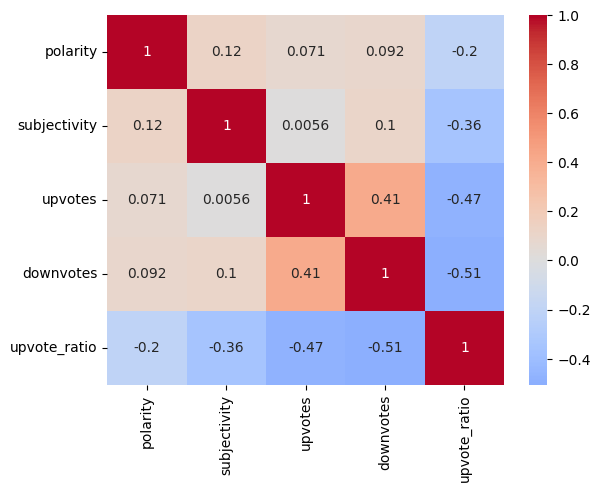

In [153]:
num_cols = ["polarity", "subjectivity", "upvotes", "downvotes", "upvote_ratio"]
corr = df[num_cols].corr(method="spearman")
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)

/Users/ake/Desktop/Jupyter Workspace/myenv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log1p

/Users/ake/Desktop/Jupyter Workspace/myenv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p

/Users/ake/Desktop/Jupyter Workspace/myenv/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract

/Users/ake/Desktop/Jupyter Workspace/myenv/lib/python3.11/site-packages/numpy/lib/function_base.py:4657: RuntimeWarning:

invalid value encountered in add



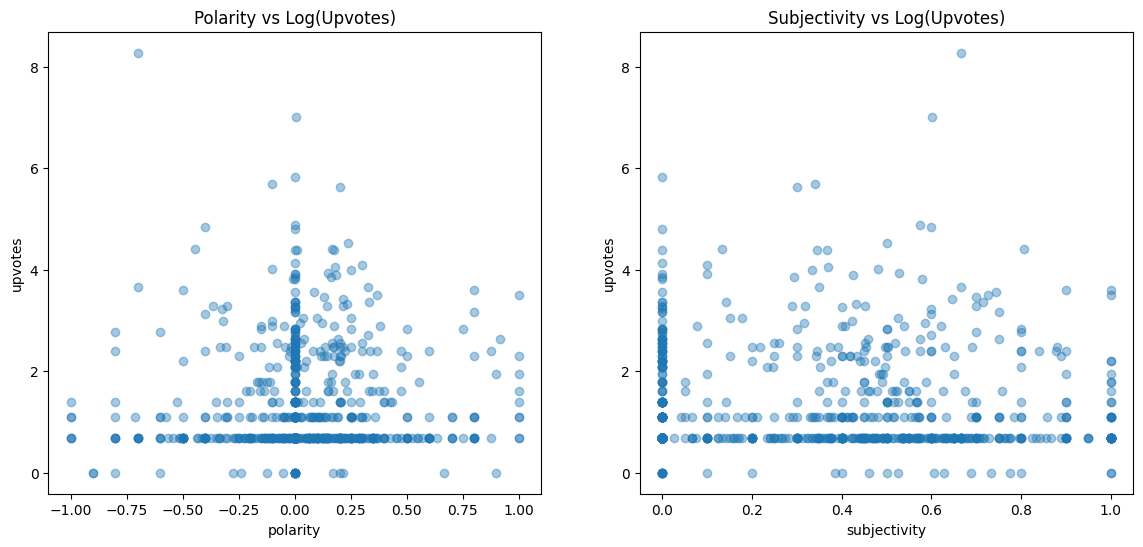

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Polarity
sns.regplot(
    data=df, x="polarity", y=np.log1p(df["upvotes"]),
    scatter_kws={"alpha":0.4}, ax=axes[0]
)
axes[0].set_title("Polarity vs Log(Upvotes)")

# Subjectivity
sns.regplot(
    data=df, x="subjectivity", y=np.log1p(df["upvotes"]),
    scatter_kws={"alpha":0.4}, ax=axes[1]
)
axes[1].set_title("Subjectivity vs Log(Upvotes)");

## 3. Deal with Missing Values

In [155]:
df.isnull().sum()

type                0
datetime            0
post_id             0
subreddit           0
title               0
author              0
url                 0
upvotes             0
downvotes         783
upvote_ratio      783
text                0
subjectivity        0
polarity            0
sentiment           0
entities            0
label               0
polarity_class      0
dtype: int64

In [156]:
df_new = df.copy()
df_new['downvotes'] = df_new['downvotes'].fillna(0) # 直接假設缺失值都是 0 (沒有被 downvote)
df_new['upvote_ratio'] = df_new['upvote_ratio'].fillna(df_new['upvote_ratio'].mean()) # 直接用平均值填補 


In [157]:
import helpers.data_mining_helpers as dmh
df_new.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,polarity_class
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Dealing with Duplicate Data

In [158]:
print(sum(df_new.duplicated()))
print(sum(df_new.duplicated('text')))
print(len(df_new))

0
23
847


In [159]:
dup = df_new[df_new.duplicated(subset='text', keep=False)]
dupp = dup.groupby('text').head(2)[:5]
dupp

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,polarity_class
34,comment,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,0.0,0.981406,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0,-1
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,0.0,0.981406,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0,-1
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.000000,Updated Daily by EOD\n\n \n[Daily Shorts](),0.100000,0.0,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0,0
105,post,2025-04-04 9:01:07,1jr7fe1,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.000000,\n\n [World Markets (stockbuyvest.com)](),0.000000,0.0,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0,0
159,post,2025-04-11 13:54:31,1jwqgce,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.000000,Gappers for today\n\n [Gappers (stockbuyvest.c...,0.000000,0.0,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0,0


In [160]:
df_new = df_new.drop_duplicates(subset='text', keep='first')


In [161]:
len(df_new)

824

## 5. Data Preprocessing

### 5.1 Sampling

因為只有824筆資料，所以就不再從中隨機抽取。但因爲資料中可能存在噪音（比如上述提及留言中有非留言內容的資訊），所以還是做個簡單篩選！

In [162]:
df_new['text_len'] = df_new['text'].str.len()
df_sample = df_new[df_new['text_len'] >= 10]

In [163]:
len(df_sample)

794

再檢查看看類別分布

原本 
- subreddit
    - stocks 274
    - StockMarket 250
    - stockstobuytoday 174
    - wallstreetbets 149

- sentiment
    - 0.0    331
    - 1.0    319
    - -1.0   197

subreddit
stocks              269
StockMarket         243
wallstreetbets      142
stockstobuytoday    140
Name: count, dtype: int64


<Axes: xlabel='subreddit', ylabel='count'>

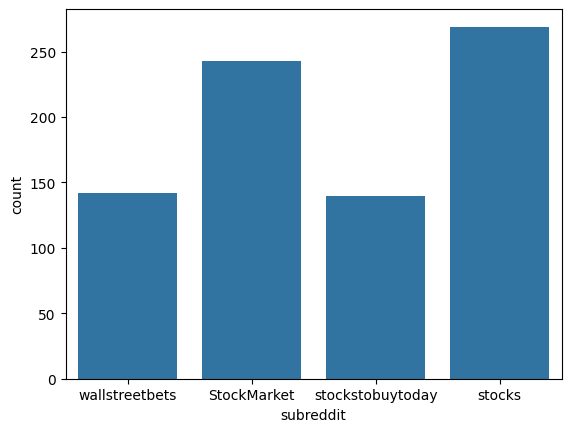

In [164]:
print(df_sample['subreddit'].value_counts())
sns.countplot(x="subreddit", data=df_sample) 

sentiment
 1.0    310
 0.0    289
-1.0    195
Name: count, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

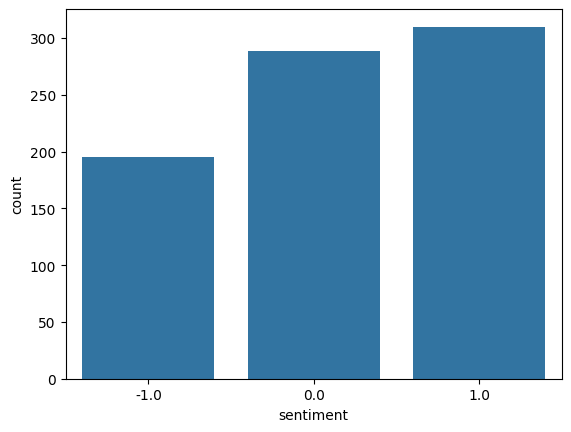

In [165]:
print(df_sample['sentiment'].value_counts())
sns.countplot(x="sentiment", data=df_sample) 

### 5.2 Feature Creation & Feature Subset Selection

In [166]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [167]:
df_sample['unigrams'] = df_sample['text'].apply(lambda x: word_tokenize(str(x)))
df_sample['bigrams']  = df_sample['text'].apply(lambda x: list(ngrams(word_tokenize(str(x)), 2)))

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1431229650.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1431229650.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
for i, row in df_sample[['text','unigrams','bigrams']].head(3).iterrows():
    print(f"Original text: {row['text']}")
    print(f"Unigrams: {row['unigrams']}")
    print(f"Bigrams: {row['bigrams']}")
    print("="*80)

Original text: Calls on retards
Unigrams: ['Calls', 'on', 'retards']
Bigrams: [('Calls', 'on'), ('on', 'retards')]
Original text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Unigrams: ['Stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'a', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', '?', 'No', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever', '.']
Bigrams: [('Stunt', 'as'), ('as', 'in'), ('in', 'like'), ('like', 'why'), ('why', 'did'), ('did', 'they'), ('they', 'even'), ('even', 'make'), ('make', 'a'), ('a', 'big'), ('big', 'deal'), ('deal', 'about'), ('about', 'starting'), ('starting', 'it'), ('it', 'in'), ('in', 'the'), ('the', 'first'), ('first', 'place'), ('place', '?'), ('?', 'No'), ('No', 'company'), ('company', 'should'), ('should', 'ever'), ('ever', 'talk'), ('talk', 'about'), ('about', 'politics'), ('politics', 'ever'), ('e

In [169]:
print(df_sample[['text']].head(3))
print(df_sample[['text','unigrams','bigrams']].head(3))

                                                text
0                                   Calls on retards
1  Stunt as in like why did they even make a big ...
2                  Seeing lots of red in the ticker.
                                                text  \
0                                   Calls on retards   
1  Stunt as in like why did they even make a big ...   
2                  Seeing lots of red in the ticker.   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   

                                             bigrams  
0                       [(Calls, on), (on, retards)]  
1  [(Stunt, as), (as, in), (in, like), (like, why...  
2  [(Seeing, lots), (lots, of), (of, red), (red, ...  


用 CountVectorizer 統計不同主題類別、情感極性下的詞頻

In [170]:
from sklearn.feature_extraction.text import CountVectorizer


In [171]:
# Do a little test
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
tokens = analyze(df_sample['text'].iloc[0])
print(tokens)

['calls', 'on', 'retards']


Unigram

In [172]:
def top_terms_by_group(df, group_col, text_col="text", topn=10, ngram_range=(1,1)):

    vectorizer = CountVectorizer(stop_words="english", ngram_range=ngram_range)
    results = {}

    for group, subset in df.groupby(group_col):
        X = vectorizer.fit_transform(subset[text_col].dropna())
        freqs = X.sum(axis=0).A1
        vocab = vectorizer.get_feature_names_out()
        term_freq = pd.DataFrame({"term": vocab, "count": freqs})
        term_freq = term_freq.sort_values("count", ascending=False).head(topn)
        results[group] = term_freq
    return results

In [173]:
top_terms_sent = top_terms_by_group(df_sample, group_col="sentiment", text_col="text", topn=10)

for sentiment, table in top_terms_sent.items():
    print(f"Top terms for sentiment = {sentiment}")
    print(table)
    print("="*60)

Top terms for sentiment = -1.0
         term  count
1320    trump     36
717      just     26
756      like     24
1282    think     20
930    people     19
559     going     17
227     china     17
1266  tariffs     16
524      fuck     15
115       bad     15
Top terms for sentiment = 0.0
              term  count
628         market     19
577           just     19
984          trump     13
1068         x200b     12
247            com     11
900   stockbuyvest     11
473          going     10
594           like     10
303            day      9
232          china      9
Top terms for sentiment = 1.0
         term  count
1439     just     50
1520     like     49
1612   market     49
505     china     46
2654    trump     43
1138     good     40
1881   people     28
2579    think     27
1692    money     26
565   company     26


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1885997491.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1885997491.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1885997491.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




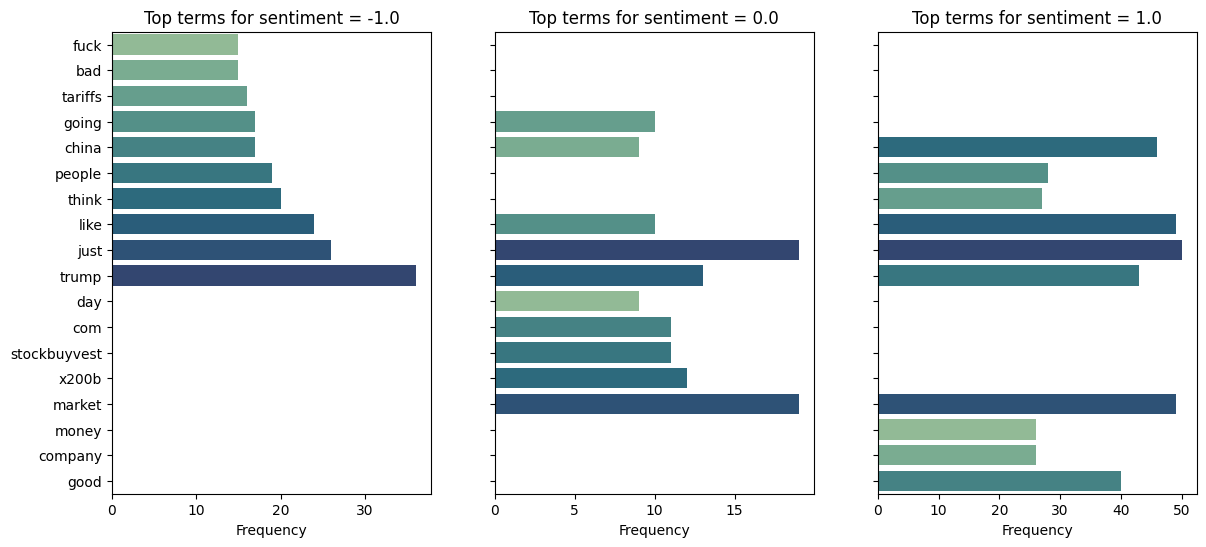

In [174]:
fig, axes = plt.subplots(1, len(top_terms_sent), figsize=(14,6), sharey=True)

for ax, (sentiment, table) in zip(axes, top_terms_sent.items()):
    sns.barplot(
        data=table.sort_values("count", ascending=True), 
        x="count", y="term", ax=ax, palette="crest", orient="h"
    )
    ax.set_title(f"Top terms for sentiment = {sentiment}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("")

In [175]:
top_terms_sub = top_terms_by_group(df_sample, group_col="subreddit", text_col="text", topn=10)

for sub, table in top_terms_sub.items():
    print(f"Top terms for subreddit = {sub}")
    print(table)
    print("="*60)


Top terms for subreddit = StockMarket
        term  count
1271   trump     41
697     just     35
223    china     31
375    doesn     15
551    going     15
376    doing     14
741     like     13
915   people     13
785     make     13
1078     say     12
Top terms for subreddit = stocks
        term  count
1956   trump     45
1352  people     35
1099    like     35
1171  market     33
1892   think     30
355    china     29
1038    just     28
1718  silver     27
1224   money     25
806    going     22
Top terms for subreddit = stockstobuytoday
              term  count
809         market     29
1199         stock     21
1409         x200b     20
764           like     19
730           just     17
294        company     14
578           good     13
281            com     13
1200  stockbuyvest     13
980          price     12
Top terms for subreddit = wallstreetbets
         term  count
267     emote     18
384       img     18
699  t5_2th52     18
434      like     16
413      just 

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1082139334.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1082139334.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1082139334.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1082139334.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

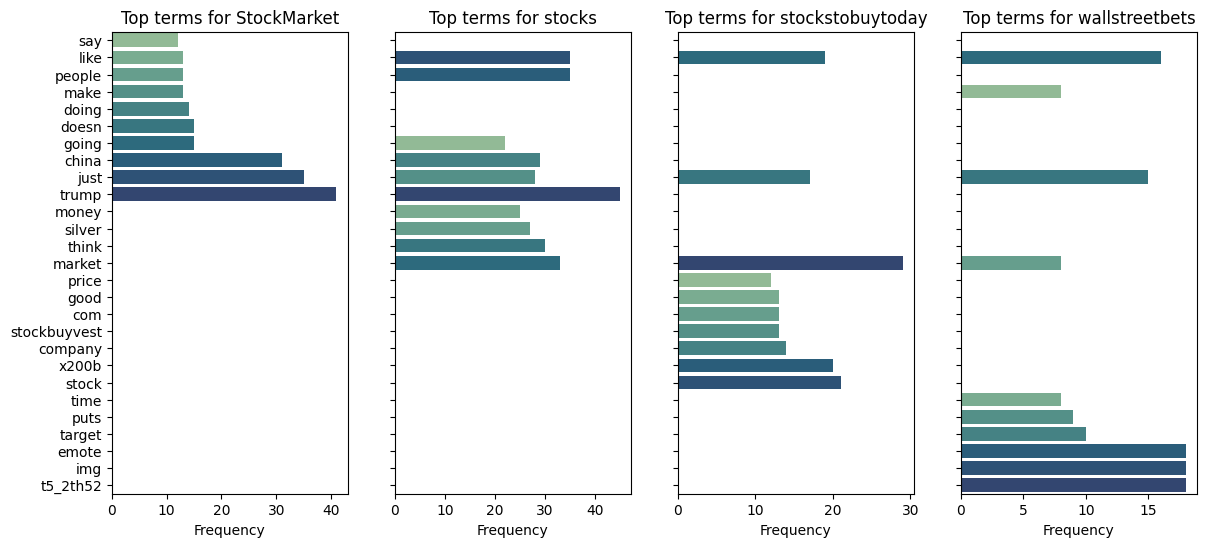

In [176]:
fig, axes = plt.subplots(1, len(top_terms_sub), figsize=(14,6), sharey=True)

for ax, (subreddit, table) in zip(axes, top_terms_sub.items()):
    sns.barplot(
        data=table.sort_values("count", ascending=True), 
        x="count", y="term", ax=ax, palette="crest", orient="h"
    )
    ax.set_title(f"Top terms for {subreddit}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("")

Bigram

In [177]:
def top_terms_by_group2(df, group_col, text_col="text", topn=10, ngram_range=(2,2)):

    vectorizer = CountVectorizer(stop_words="english", ngram_range=ngram_range)
    results = {}

    for group, subset in df.groupby(group_col):
        X = vectorizer.fit_transform(subset[text_col].dropna())
        freqs = X.sum(axis=0).A1
        vocab = vectorizer.get_feature_names_out()
        term_freq = pd.DataFrame({"term": vocab, "count": freqs})
        term_freq = term_freq.sort_values("count", ascending=False).head(topn)
        results[group] = term_freq
    return results

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1492936396.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1492936396.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/1492936396.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




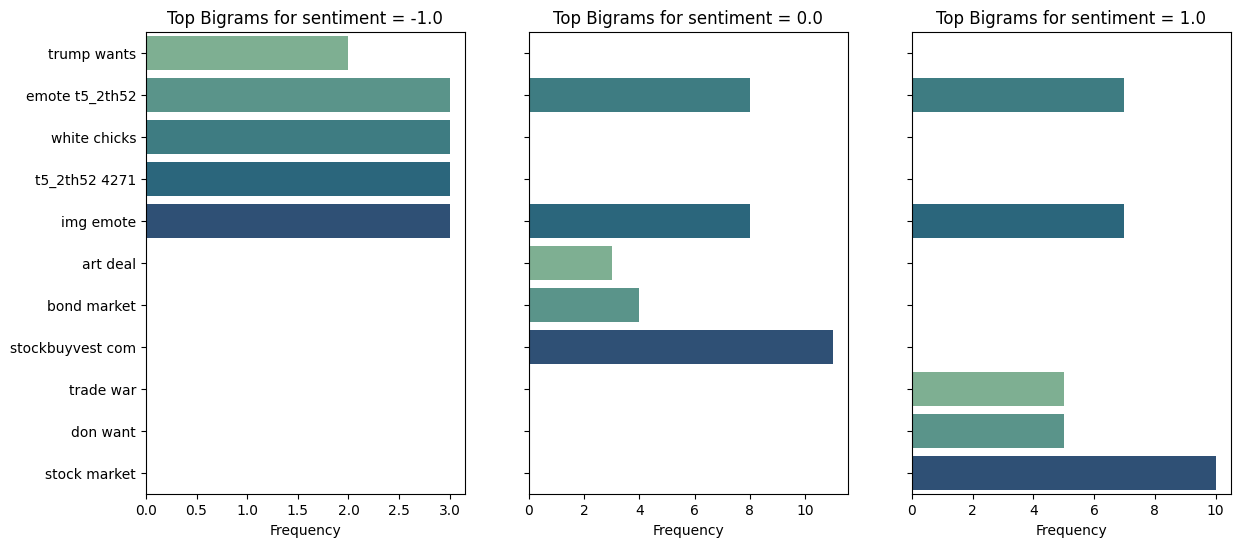

In [178]:
top_terms_sent2 = top_terms_by_group2(df_sample, group_col="sentiment", text_col="text", topn=5)

fig, axes = plt.subplots(1, len(top_terms_sent), figsize=(14,6), sharey=True)

for ax, (sentiment, table) in zip(axes, top_terms_sent2.items()):
    sns.barplot(
        data=table.sort_values("count", ascending=True), 
        x="count", y="term", ax=ax, palette="crest", orient="h"
    )
    ax.set_title(f"Top Bigrams for sentiment = {sentiment}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("")

StockMarket看起來有很多關於種族的字眼

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/4057260602.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/4057260602.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/4057260602.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/4057260602.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

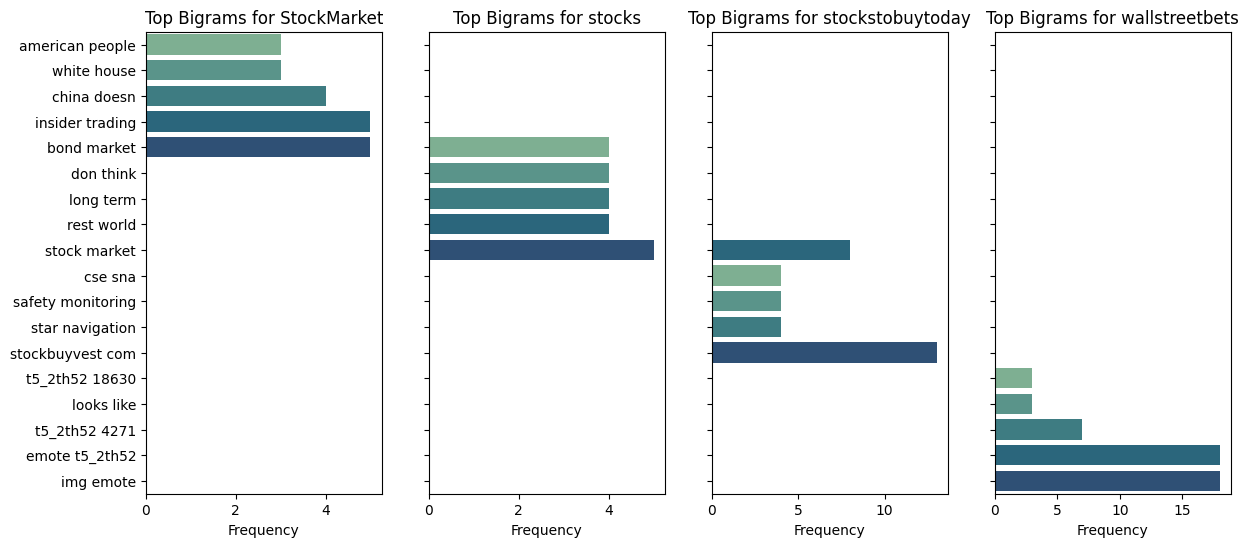

In [179]:
top_terms_sub2 = top_terms_by_group2(df_sample, group_col="subreddit", text_col="text", topn=5)

fig, axes = plt.subplots(1, len(top_terms_sub2), figsize=(14,6), sharey=True)

for ax, (subreddit, table) in zip(axes, top_terms_sub2.items()):
    sns.barplot(
        data=table.sort_values("count", ascending=True), 
        x="count", y="term", ax=ax, palette="crest", orient="h"
    )
    ax.set_title(f"Top Bigrams for {subreddit}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("")

In [180]:
count_vect = CountVectorizer(
    stop_words='english',
    token_pattern=r'(?u)\b[a-zA-Z][a-zA-Z]+\b',
    min_df=3,
    max_df=0.9)

corpus = df_sample['text'].astype(str).fillna("")
X_counts = count_vect.fit_transform(corpus)  
terms = count_vect.get_feature_names_out()

print("DTM shape (docs × terms):", X_counts.shape)
print(terms[:20])

DTM shape (docs × terms): (794, 840)
['able' 'absolutely' 'acquisition' 'actual' 'actually' 'adding'
 'additional' 'adjust' 'administration' 'advice' 'advisors' 'affect' 'ago'
 'agree' 'ai' 'allies' 'allocation' 'allowed' 'amazon' 'amc']


In [181]:
terms = count_vect.get_feature_names_out()
freqs = np.asarray(X_counts.sum(axis=0)).ravel()

top_idx = freqs.argsort()[::-1][:20]   # 排序取前 20
for term, freq in zip(terms[top_idx], freqs[top_idx]):
    print(term, freq)

just 95
trump 92
like 83
market 82
china 72
think 52
people 51
going 50
money 46
good 44
tariffs 39
make 36
time 36
want 35
stock 34
don 34
doing 32
right 29
company 29
silver 29


In [182]:
i = 68
row_vec = X_counts[i, :500].toarray()[0] 
row_vec

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [183]:
nonzero_idx = np.where(row_vec > 0)[0]
print(f"\nDoc {i} 非零位置:", nonzero_idx.tolist())
print("對應詞：", terms[:500][nonzero_idx].tolist())


Doc 68 非零位置: [80, 148, 234, 293, 297, 350, 427, 452]
對應詞： ['called', 'cult', 'expect', 'going', 'good', 'idea', 'look', 'market']


Text(0.5, 1.0, 'Heatmap (Top 20 docs × Top 20 terms)')

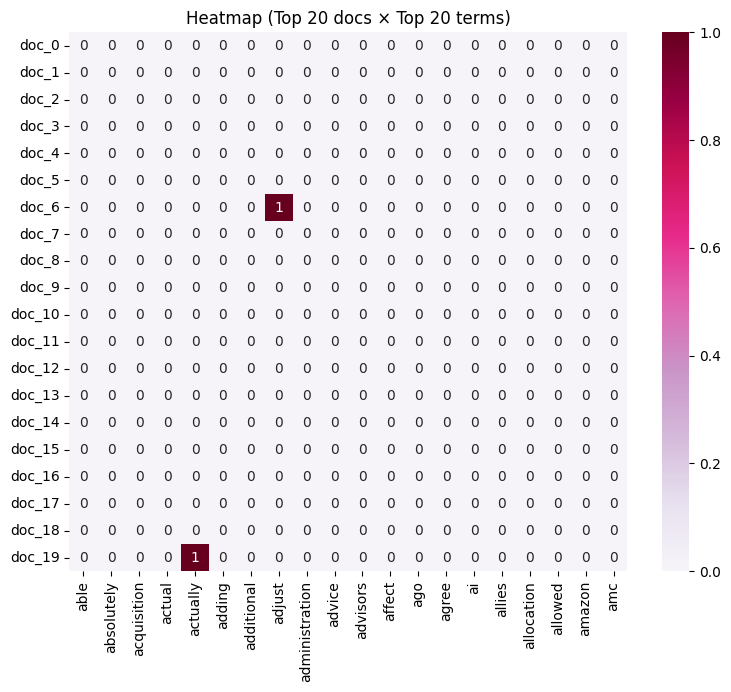

In [184]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_x = [f"{t}" for t in terms[:20]]  
plot_y = [f"doc_{idx}" for idx in range(20)]  

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=plot_z.max() if plot_z.max()>0 else 1, annot=True)
plt.title("Heatmap (Top 20 docs × Top 20 terms)")

Text(0.5, 1.0, 'Heatmap Top 20 doc × Top 20 terms')

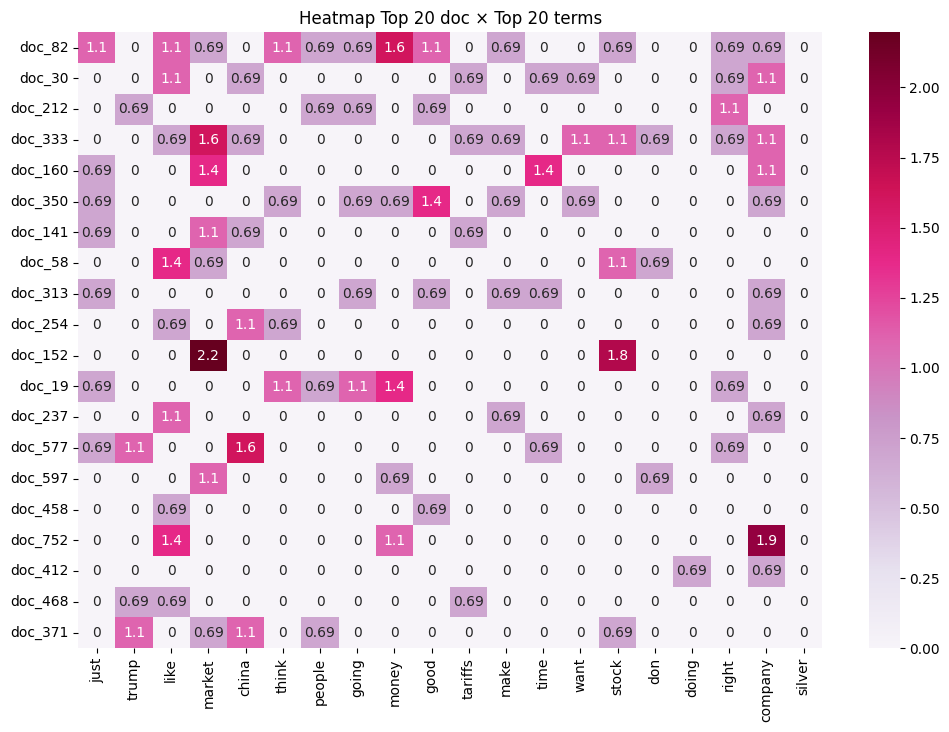

In [185]:
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()  
doc_len   = np.asarray(X_counts.sum(axis=1)).ravel()  

K_terms = 20
K_docs  = 20
top_term_idx = term_freq.argsort()[::-1][:K_terms] # freq最高的 K 個詞
top_doc_idx  = doc_len.argsort()[::-1][:K_docs] # 取字數最多的 K 篇文件

sub = X_counts[top_doc_idx, :][:, top_term_idx]      
plot_z2 = np.log1p(sub.toarray()) # log(1+x)
# plot_z2 = sub.toarray()   
plot_x2 = terms[top_term_idx]
plot_y2 = [f"doc_{i}" for i in top_doc_idx]

df_todraw2 = pd.DataFrame(plot_z2, columns=plot_x2, index=plot_y2)

plt.subplots(figsize=(max(9, K_terms*0.6), max(7, K_docs*0.4)))
ax = sns.heatmap(df_todraw2, cmap="PuRd", vmin=0, vmax=plot_z2.max(), annot=True)
plt.xticks(rotation=90); plt.yticks(rotation=0)
plt.title(f"Heatmap Top {K_docs} doc × Top {K_terms} terms")

### 5.3 Aggregation

In [186]:
doc_term = np.asarray(X_counts.sum(axis=1)).ravel()
doc_term

array([  2,  10,   4,  35,   3,   0,  19,   7,  14,   1,   0,   4,   6,
        12,   3,   1,   0,  31,   2,  43,   3,   3,  11,   2,   6,   7,
         1,   1,   2,   5, 108,   5,   1,   5,  12,   7,   4,  14,   6,
         5,  16,   1,   9,   6,   8,   3,   2,   7,   5,   7,   6,  10,
         5,   3,   0,   4,   5,   1,  64,   2,   5,  18,   1,   3,  11,
         4,   1,  26,  20,   4,   3,   4,  12,   5,  15,   5,   6,   8,
         3,   2,   9,  12, 120,   1,  11,   3,   3,  11,   8,   3,   3,
         3,  14,  28,   4,   3,   1,   5,   4,   3,   4,   0,   0,   1,
        17,   1,   5,   3,   3,   5,   9,   5,   5,   5,   3,   1,  16,
         7,   3,   7,   2,   0,   4,  12,  13,   1,   5,   6,   4,   4,
        18,   3,   7,   3,   0,  21,   4,  17,  11,   6,   8,  65,  10,
         1,   4,   9,   0,   6,  22,  16,   2,   3,  45,  21,   5,   5,
         5,  14,   1,  10,  84,   7,  15,   6,  12,   3,   5,   4,   3,
         3,   0,  15,   4,  14,  11,   2,   7,   7,   1,   2,   

In [187]:
print(df_sample.loc[1, "text"])
print("Original length:", len(df_sample.loc[1, "text"].split())) # 原始詞數
print("----")
print("Processed tokens:", analyze(df_sample.loc[1, "text"]))
print("non-zero counts:", len(X_counts[1].toarray()[0].nonzero()[0])) 
print("Document term frequency:", doc_term[1].sum()) # tokenize、去除停用詞後

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Original length: 27
----
Processed tokens: ['stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', 'no', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever']
non-zero counts: 10
Document term frequency: 10


In [188]:
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
term_freq

array([ 6,  3,  3,  5, 11,  3,  4,  3, 10,  7,  3,  3, 12,  4,  5,  7,  6,
        3,  4,  4, 16, 19,  9,  4, 10,  3,  8,  5,  3,  6,  3,  7,  3,  7,
        4,  7,  6,  4,  3,  6,  7, 18,  6,  3,  3,  5,  7,  7,  4,  4,  4,
       11,  7,  4, 20,  4, 16,  5,  6,  5,  4,  3,  4, 16, 16,  4,  8,  5,
        4,  3,  4,  8,  8,  4,  3,  7,  4, 24,  3, 13, 11, 14,  3,  6,  6,
        5,  8,  3,  3, 10,  3,  4,  6,  4,  4,  4,  6,  4,  7,  3,  5,  7,
        3, 72, 13,  3,  7,  3,  4,  3,  4,  5,  5,  7, 13,  4, 13,  9,  8,
        4,  3,  3, 23, 29,  3,  8,  5,  7,  3,  4,  3,  3,  4,  5,  3,  8,
        3,  4, 13, 15,  5,  3,  3,  6,  4,  7,  4,  4,  3,  3,  4,  9, 12,
        6,  5,  3,  3, 10,  3, 27, 10,  4,  4, 13,  8,  3,  3,  3,  4,  3,
        5,  5,  5,  3,  3,  3,  4, 25, 14,  7,  3,  3,  3,  3,  8, 19, 24,
        3, 32, 24,  6, 34,  4,  7,  3,  3,  3,  3,  8,  3,  6,  6,  4,  4,
        3, 10,  6,  3,  3,  8,  3, 26,  3,  3,  3,  4,  4,  4,  8,  4, 18,
       15,  4,  6,  5,  4

- x 軸：前 300 個詞
- y 軸：對應的總詞頻

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/3418450036.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



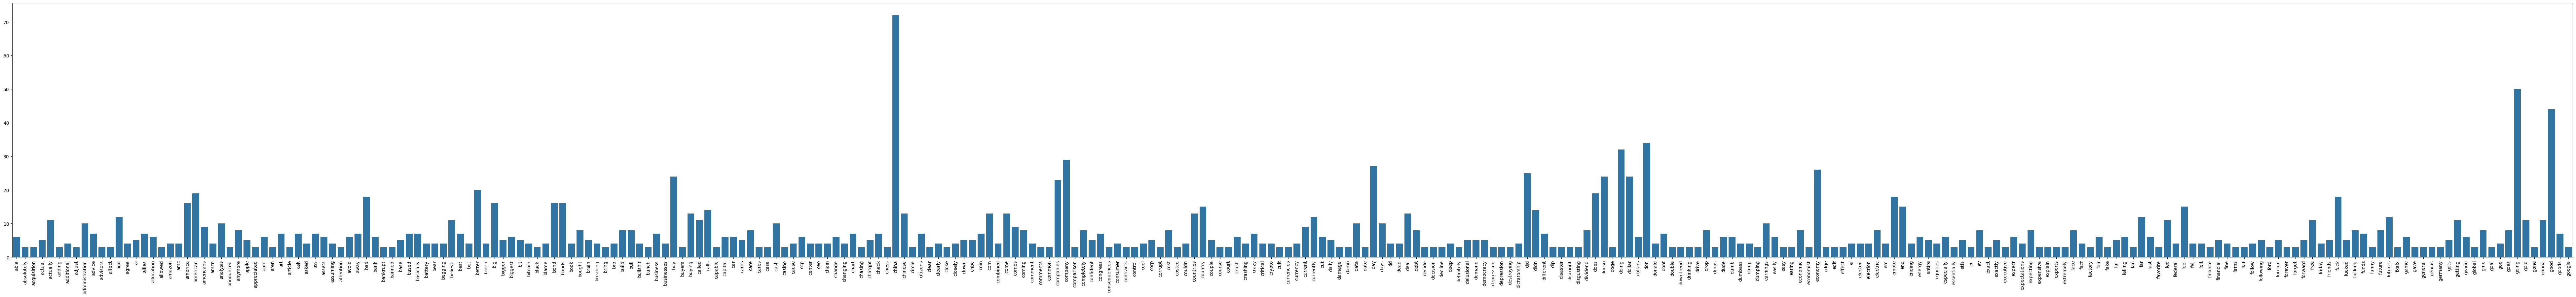

In [189]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=terms[:300], 
            y=term_freq[:300])
g.set_xticklabels(terms[:300], rotation = 90);

一樣的東西，但是改成互動式

In [190]:
import plotly.express as px

fig = px.bar(
    x=terms[:300],
    y=term_freq[:300],
    labels={'x': 'Terms', 'y': 'Frequencies'}
)

fig.update_layout(
    xaxis_tickangle=90,
    width=1200,
    height=600
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Terms=%{x}<br>Frequencies=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['able', 'absolutely', 'acquisition', ..., 'good', 'goods', 'google'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([ 6,  3,  3, ..., 44,  7,  3]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'width': 1200,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'tickangle': 90, 'title': {'text': 'Terms'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Frequencies'}}}
})

Text(0.5, 1.0, 'Top terms by frequency')

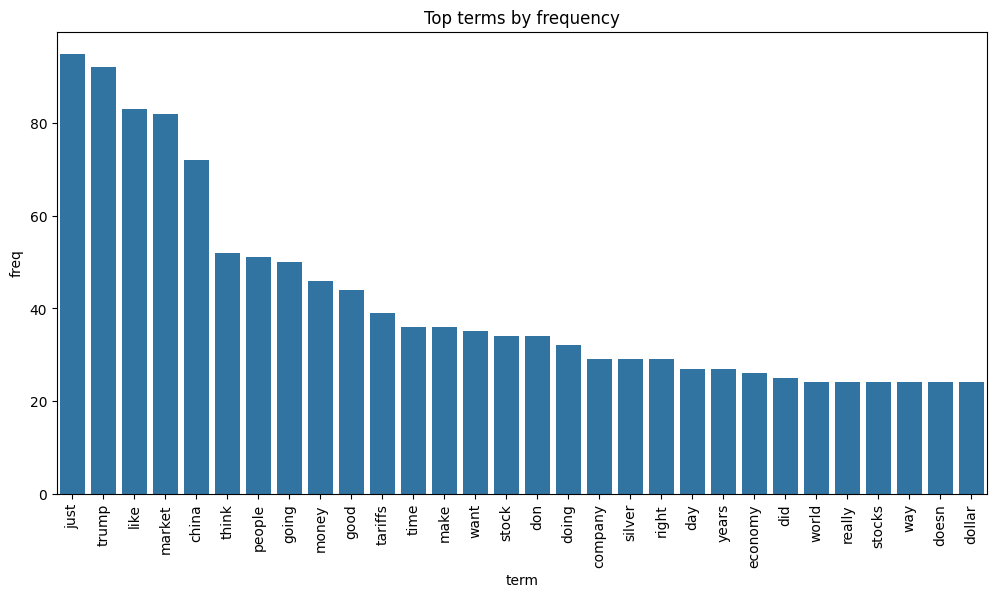

In [191]:
df_terms = pd.DataFrame({
    "term": terms,
    "freq": term_freq
}).sort_values(by="freq", ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.barplot(data=df_terms.head(30), x="term", y="freq") 
plt.xticks(rotation=90, ha='center')
plt.title("Top terms by frequency")

詞頻的對數分布圖

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_72355/404766302.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



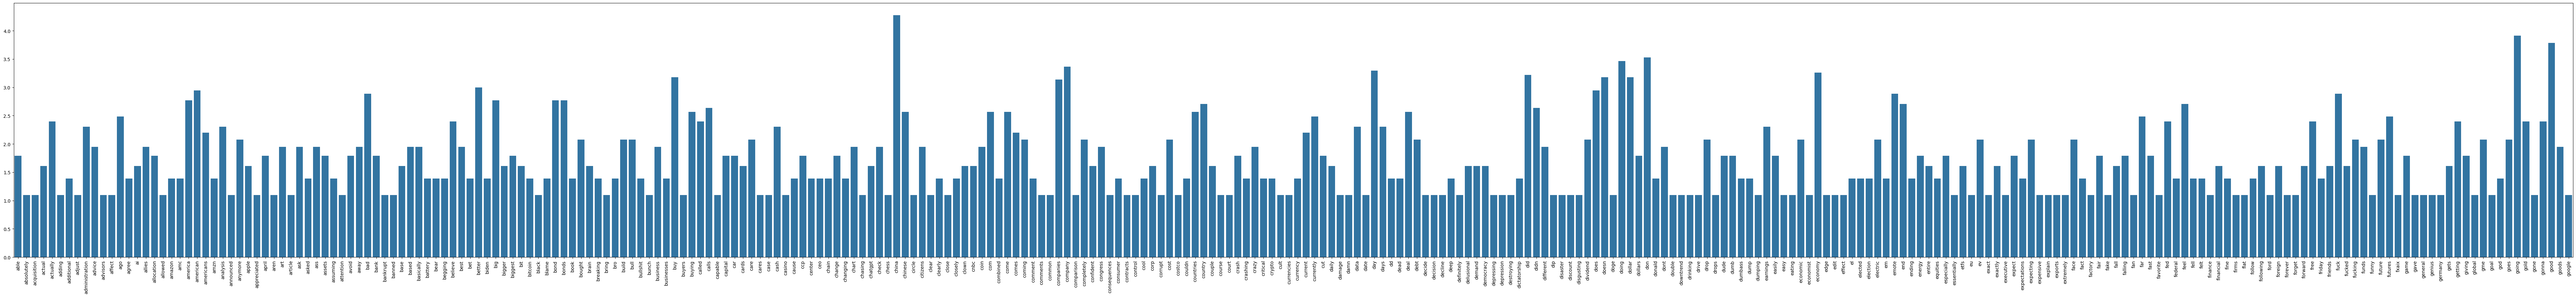

In [192]:
import math
term_frequencies_log = [math.log(i) for i in term_freq]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=terms[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(terms[:300], rotation = 90);

In [193]:
sorted_idx = np.argsort(term_freq)[::-1]  

terms_sorted = count_vect.get_feature_names_out()[sorted_idx]
freq_sorted = np.array(term_freq)[sorted_idx]
freq_log_sorted = np.array(term_frequencies_log)[sorted_idx]

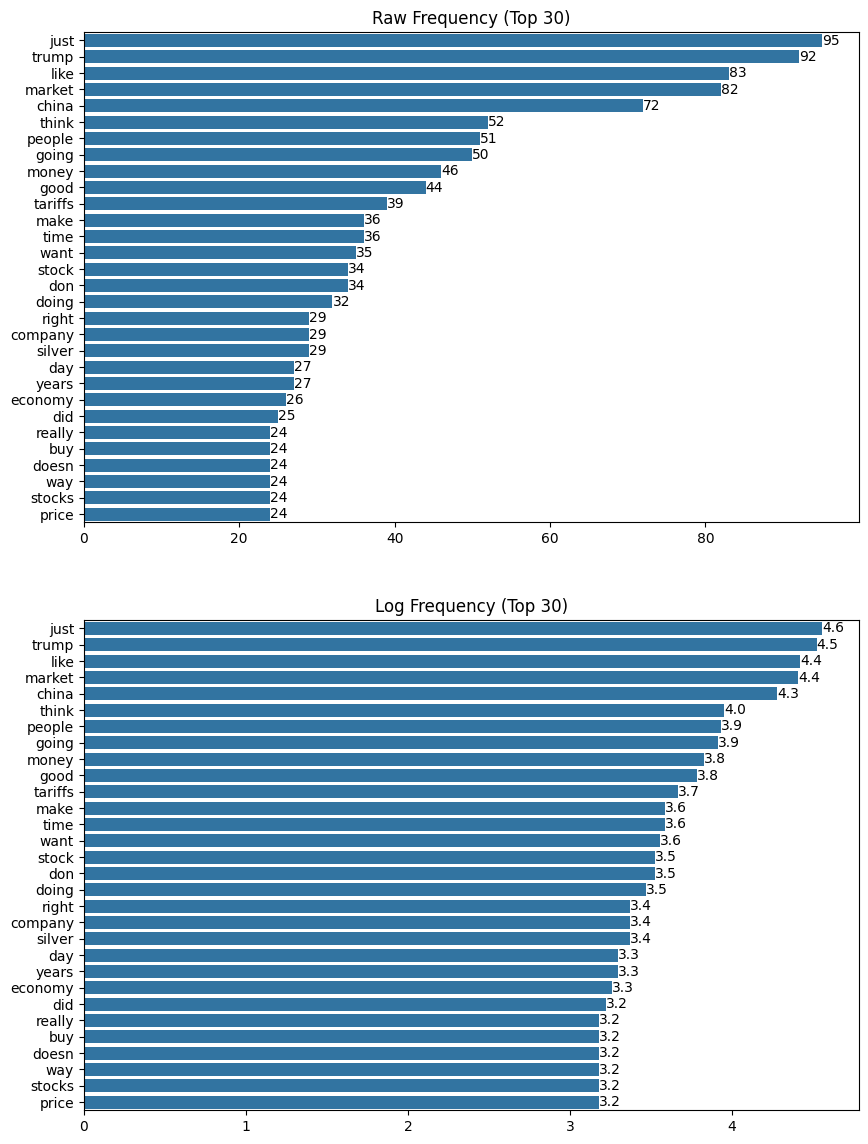

In [194]:
K = 30

fig, axes = plt.subplots(2, 1, figsize=(10, 14), sharex=False)

sns.barplot(y=terms_sorted[:K], x=freq_sorted[:K], ax=axes[0], orient="h")
axes[0].set_title("Raw Frequency (Top 30)")

sns.barplot(y=terms_sorted[:K], x=freq_log_sorted[:K], ax=axes[1], orient="h")
axes[1].set_title("Log Frequency (Top 30)")

for i, v in enumerate(freq_sorted[:K]):
    axes[0].text(v, i, f"{int(v)}", va="center")

for i, v in enumerate(freq_log_sorted[:K]):
    axes[1].text(v, i, f"{v:.1f}", va="center")

In [195]:
X_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5628 stored elements and shape (794, 840)>

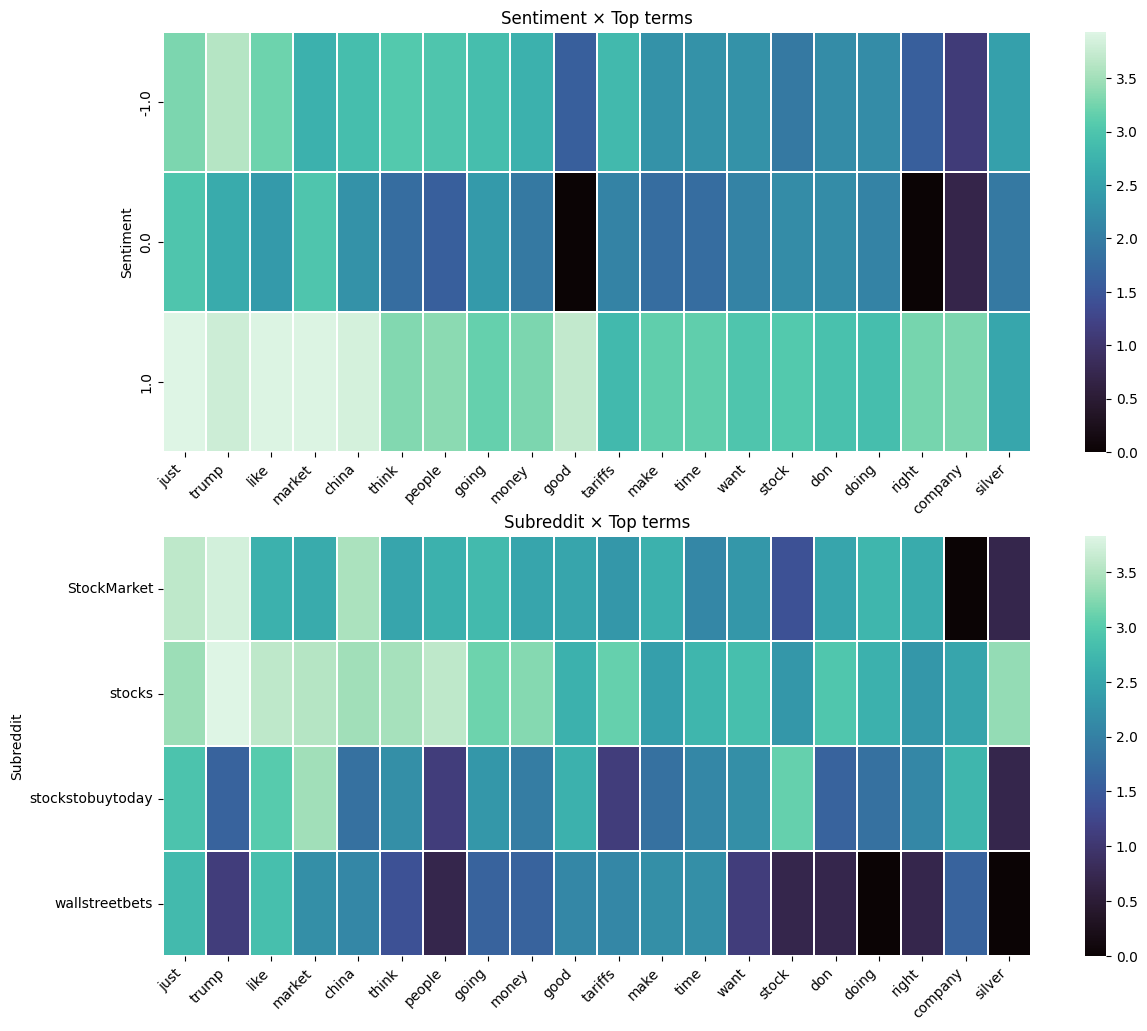

In [196]:
K = 20
top_idx = term_freq.argsort()[::-1][:K]
sel_terms = terms[top_idx]

# sentiment × terms
mat1 = pd.DataFrame(X_counts.toarray()[:, top_idx], columns=sel_terms)
mat1["sentiment"] = df_sample["sentiment"].astype(str).values
G1 = mat1.groupby("sentiment")[sel_terms].sum()
G1_log = np.log1p(G1)

# subreddit × terms
mat2 = pd.DataFrame(X_counts.toarray()[:, top_idx], columns=sel_terms)
mat2["subreddit"] = df_sample["subreddit"].astype(str).values
G2 = mat2.groupby("subreddit")[sel_terms].sum()
G2_log = np.log1p(G2)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

sns.heatmap(G1_log, cmap="mako", linewidths=.3, ax=axes[0])
axes[0].set_title("Sentiment × Top terms")
axes[0].set_ylabel("Sentiment")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

sns.heatmap(G2_log, cmap="mako", linewidths=.3, ax=axes[1])
axes[1].set_title("Subreddit × Top terms")
axes[1].set_ylabel("Subreddit")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right");


# Phase 2

In [197]:
### Begin Assignment Here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [198]:
df_sample.head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,polarity_class,text_len,unigrams,bigrams
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,0.981406,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,-1,16,"[Calls, on, retards]","[(Calls, on), (on, retards)]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,0.981406,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,1,137,"[Stunt, as, in, like, why, did, they, even, ma...","[(Stunt, as), (as, in), (in, like), (like, why..."
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,0.0,0.981406,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,0,33,"[Seeing, lots, of, red, in, the, ticker, .]","[(Seeing, lots), (lots, of), (of, red), (red, ..."
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.980000,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,1,1067,"[Vision, Marine, Technologies, Inc., is, rewri...","[(Vision, Marine), (Marine, Technologies), (Te..."
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,0.0,0.981406,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,0,24,"[He, didn, ’, t, say, thank, you, .]","[(He, didn), (didn, ’), (’, t), (t, say), (say..."


In [199]:
X = df_sample.copy()
sentiments = X['sentiment'].unique()  # Get unique labels
sentiment_dfs = {} 

for sent in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sent] = X[X['sentiment'] == sent].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sent in sentiments:
    filt_term_document_dfs[sent] = create_term_document_df(sentiment_dfs[sent])

In [200]:
X = df_sample.copy()
subreddits = X['subreddit'].unique()  # Get unique labels
subreddit_dfs = {} 

for sub in subreddits:
    # Filter the original DataFrame by sentiment
    subreddit_dfs[sub] = X[X['subreddit'] == sub].copy()

# Create term-document frequency DataFrames for each category
filt_term_document_dfs_sub = {}  # Dictionary to store term-document DataFrames for each category

for sub in subreddits:
    filt_term_document_dfs_sub[sub] = create_term_document_df(subreddit_dfs[sub])

In [201]:
# Display the filtered DataFrame for one of the sentiments <0:Sentiment -1.0, 1:Sentiment 1.0, 2:Sentiment 0.0>
sentiment_number = 2
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment 0.0:


,00,000,02,03,10,100,10yr,11,12,1242,...,yeah,year,years,yesterday,yet,yields,yo,you,your,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
subreddit_number = 3 # 0: wallstreetbets, 1: StockMarket, 2: stockstobuytoday, 3: stocks
print(f"Filtered Term-Document Frequency DataFrame for Subreddit {subreddits[subreddit_number]}:")
filt_term_document_dfs_sub[subreddits[subreddit_number]]

Filtered Term-Document Frequency DataFrame for Subreddit stocks:


,00,000,02,03,06,10,100,10000,10ks,10yr,...,you,young,your,yours,yourself,yoyo,yup,zero,zgld,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0.98, 'Term Frequency Distribution per Sentiment')

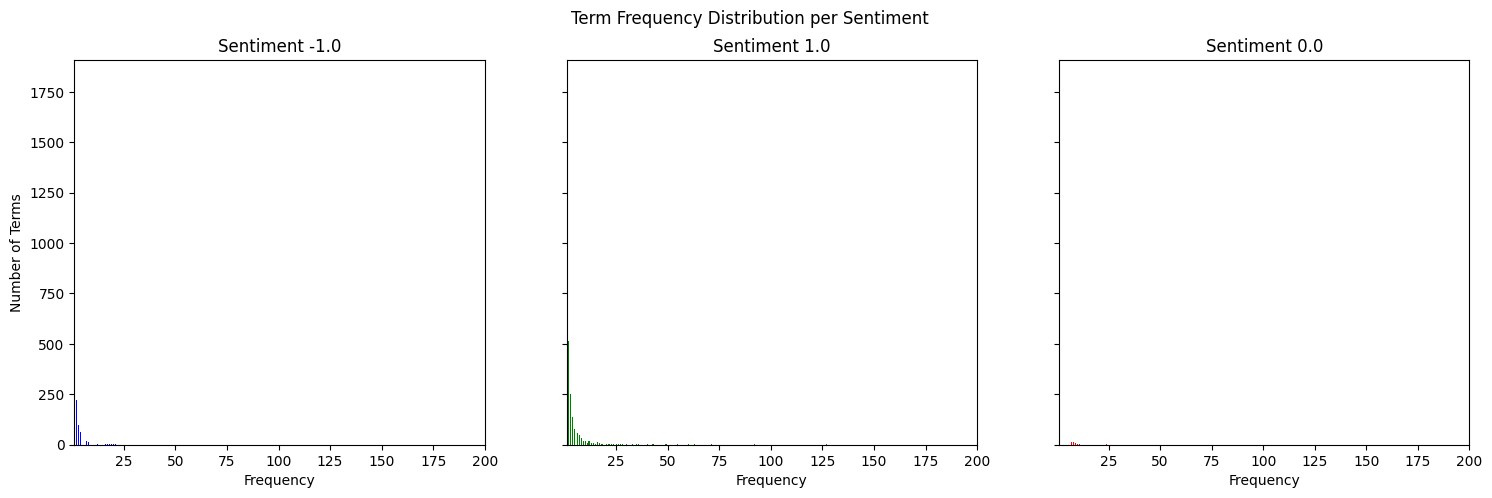

In [203]:
 # Sum over all documents to get total frequency for each word

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
colors = ['blue', 'green', 'red']

for idx, (sent, ax) in enumerate(zip(sentiments[:3], axes)):
    word_counts = filt_term_document_dfs[sent].sum(axis=0).to_numpy()
    ax.hist(word_counts, bins=1000, color=colors[idx])
    ax.set_title(f'Sentiment {sent}')
    ax.set_xlim(1, 200)
    ax.set_xlabel('Frequency')
    if idx == 0:
        ax.set_ylabel('Number of Terms')

plt.suptitle('Term Frequency Distribution per Sentiment')


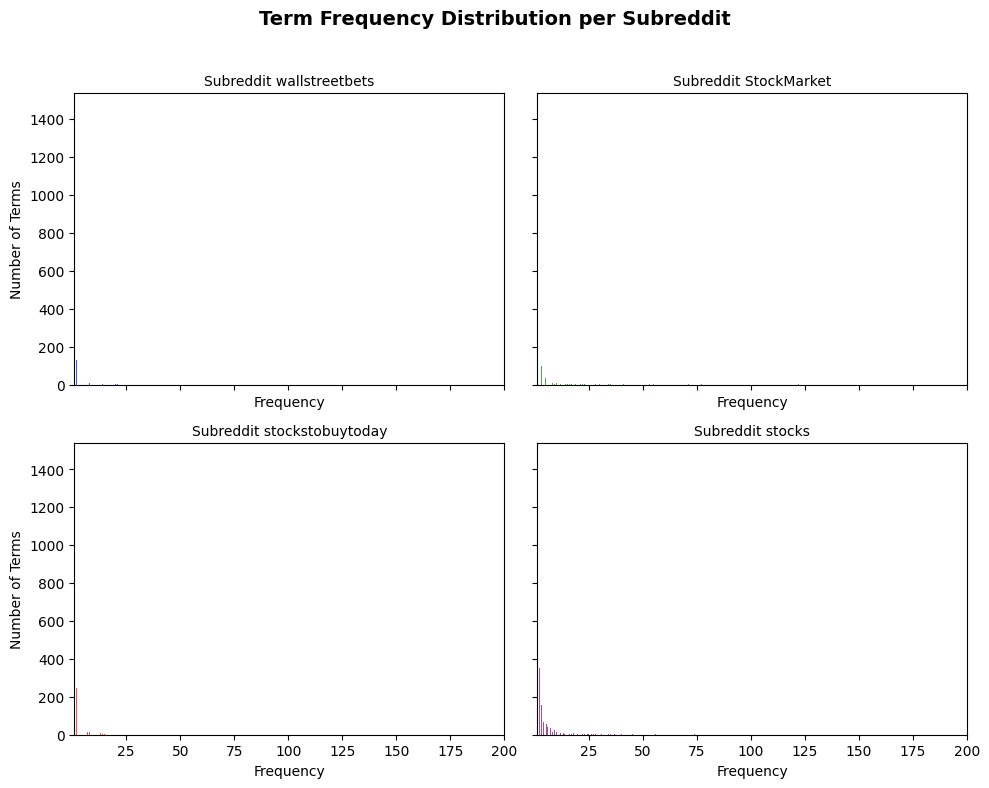

In [204]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()  # 把 2x2 轉成一維方便迴圈
colors = ['blue', 'green', 'red', 'purple']

for idx, (sub, ax) in enumerate(zip(subreddits[:4], axes)):
    word_counts = filt_term_document_dfs_sub[sub].sum(axis=0).to_numpy()
    ax.hist(word_counts, bins=1000, color=colors[idx], alpha=0.7)
    ax.set_title(f'Subreddit {sub}', fontsize=10)
    ax.set_xlim(1, 200)
    ax.set_xlabel('Frequency')
    if idx in [0, 2]:
        ax.set_ylabel('Number of Terms')

plt.suptitle('Term Frequency Distribution per Subreddit', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

It is difficult to clearly observe the distribution from the graphs above, so I use a log scale on the y-axis to spread out the values and reduce skewness.

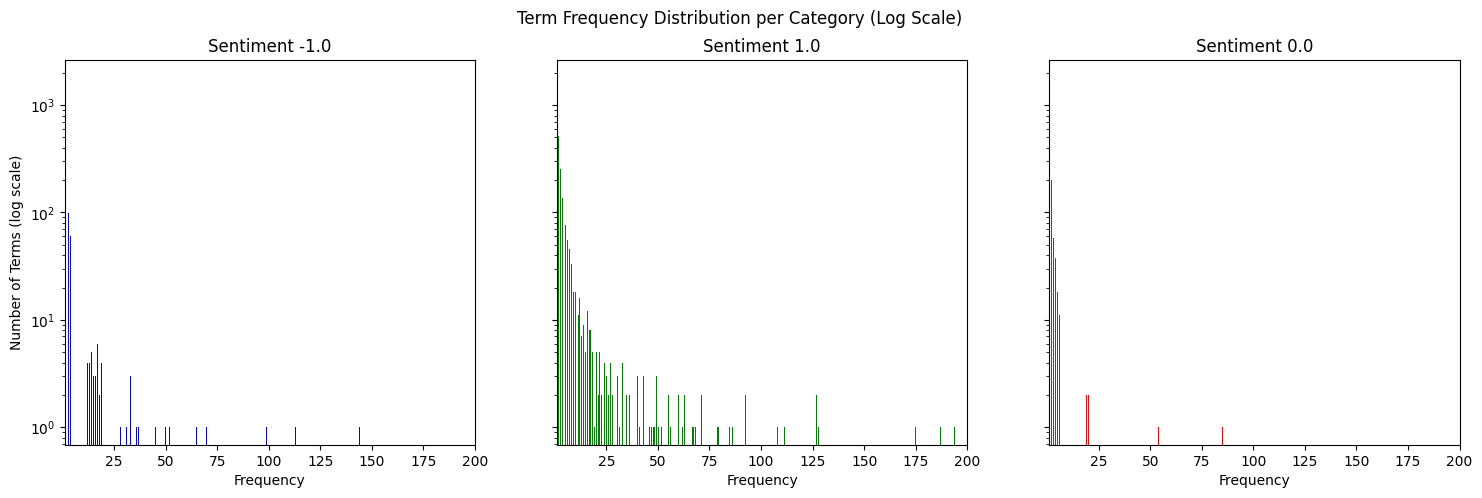

In [205]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
colors = ['blue', 'green', 'red']

for idx, (sent, ax) in enumerate(zip(sentiments[:3], axes)):
    word_counts = filt_term_document_dfs[sent].sum(axis=0).to_numpy()
    ax.hist(word_counts, bins=1000, color=colors[idx], log=True) 
    ax.set_title(f'Sentiment {sent}')
    ax.set_xlim(1, 200)
    ax.set_xlabel('Frequency')
    if idx == 0:
        ax.set_ylabel('Number of Terms (log scale)')

plt.suptitle('Term Frequency Distribution per Category (Log Scale)')
plt.show()

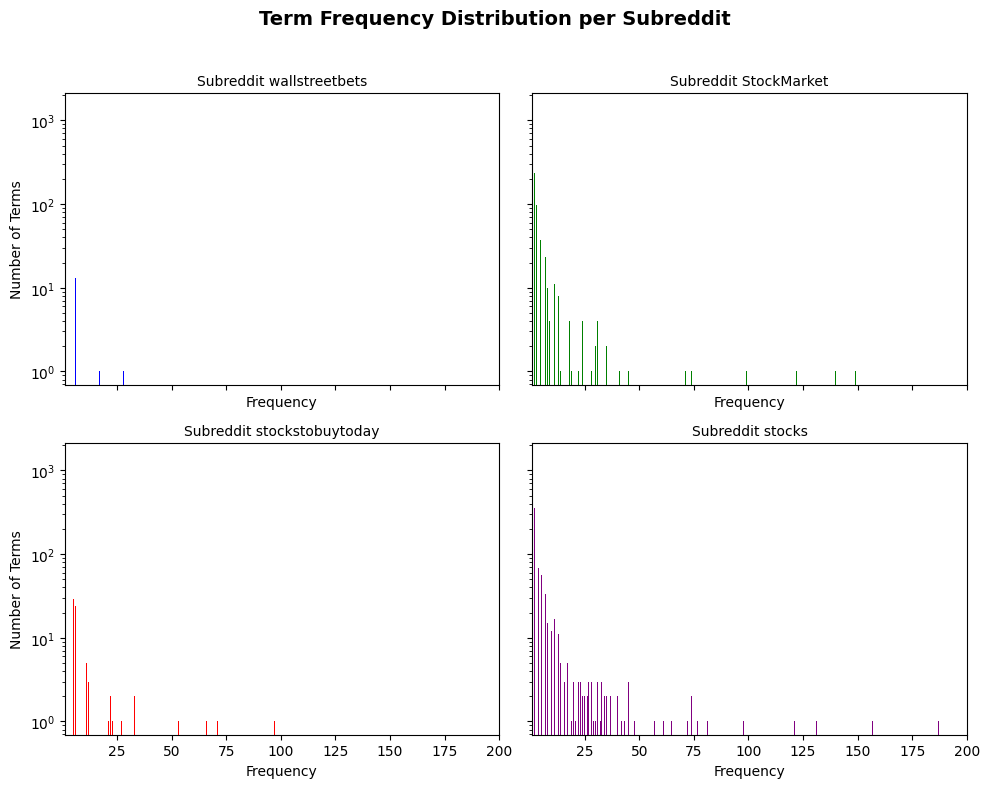

In [206]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()  # 把 2x2 轉成一維方便迴圈
colors = ['blue', 'green', 'red', 'purple']

for idx, (sub, ax) in enumerate(zip(subreddits[:4], axes)):
    word_counts = filt_term_document_dfs_sub[sub].sum(axis=0).to_numpy()
    ax.hist(word_counts, bins=1000, color=colors[idx], log=True)
    ax.set_title(f'Subreddit {sub}', fontsize=10)
    ax.set_xlim(1, 200)
    ax.set_xlabel('Frequency')
    if idx in [0, 2]:
        ax.set_ylabel('Number of Terms')

plt.suptitle('Term Frequency Distribution per Subreddit', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The results closely match the findings from the dataset used in the Master File. Most of the words appear very infrequently across the entire dataset, while a small number of words appear quite often.

In [207]:
X['sentiment'].value_counts()

sentiment
 1.0    310
 0.0    289
-1.0    195
Name: count, dtype: int64

Because the number of documents in each sentiment category is relatively small, the high-frequency threshold is set to 0.03.

In [208]:
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.03, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

In [209]:
term_document_dfs = {}
for s in sentiments:
    print(f'\nFor sentiment {s} we filter the following words:')
    term_document_dfs[s] = filter_top_bottom_words_by_sum(filt_term_document_dfs[s])


For sentiment -1.0 we filter the following words:
Bottom 1.0% words: 
01378        1
needs        1
necessary    1
nearly       1
naw          1
navarro      1
nation       1
nasdaq       1
name         1
nah          1
myself       1
musky        1
multikine    1
moves        1
move         1
mostly       1
dtype: int64
Top 3.0% words: 
china      17
we         17
their      17
when       17
has        17
even       18
re         18
people     19
an         19
or         19
now        19
my         20
think      20
about      20
was        21
his        21
all        22
at         23
have       24
like       24
what       25
can        26
just       26
with       26
us         26
not        26
as         28
but        29
will       31
on         33
so         33
be         33
they       34
if         35
trump      36
are        37
he         45
for        50
you        52
this       57
that       65
of         67
in         70
it         99
is        113
and       121
to        144
t

In [210]:
sentiment_num = 1
print(f"Filtered Term-Document Frequency Dataframe for Sentiment {sentiments[sentiment_number]}")
term_document_dfs[sentiments[sentiment_num]]

Filtered Term-Document Frequency Dataframe for Sentiment 0.0


,00,000,06,08,10,100,1000,10000,10k,10ks,...,yields,yippee,yo,young,yours,yourself,yoyo,zero,zgld,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### PAMI

In [211]:
from PAMI.extras.convert.DF2DB import DF2DB   

sentiment_labels = {
    -1.0: "neg",
     0.0: "neu",
     1.0: "pos"
}

for sentiment in term_document_dfs:
    label = sentiment_labels.get(sentiment, f"sent_{sentiment}") 
    obj = DF2DB(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{label}.csv', '>=', 1)

Database size (total no of transactions) : 195
Number of items : 1567
Minimum Transaction Size : 1
Average Transaction Size : 14.841025641025642
Maximum Transaction Size : 73
Standard Deviation Transaction Size : 12.173967980242018
Variance in Transaction Sizes : 148.9694422416072
Sparsity : 0.9905290200121087


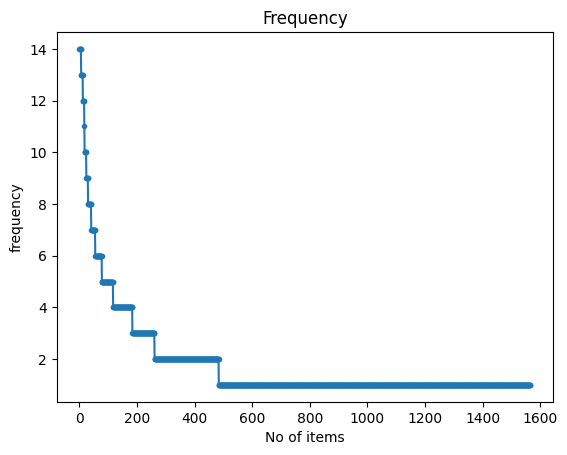

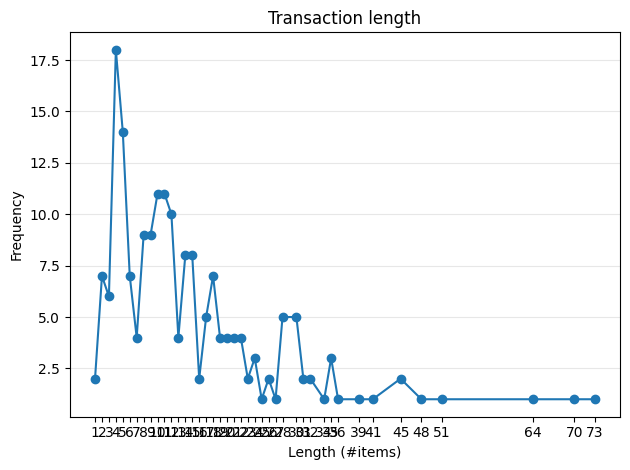

In [212]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neg.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 287
Number of items : 1201
Minimum Transaction Size : 1
Average Transaction Size : 7.076655052264808
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 5.101859191367123
Variance in Transaction Sizes : 26.119977583392217
Sparsity : 0.9941076977083557


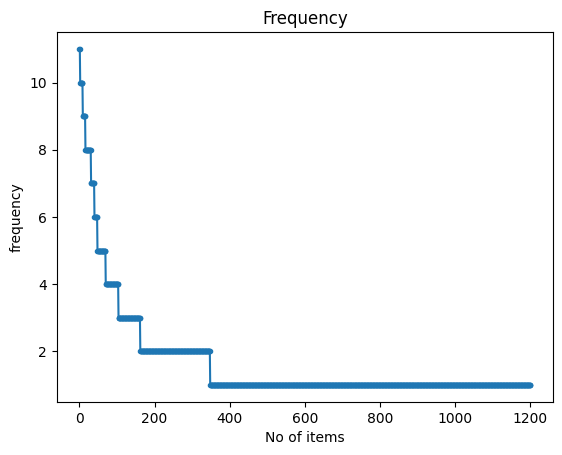

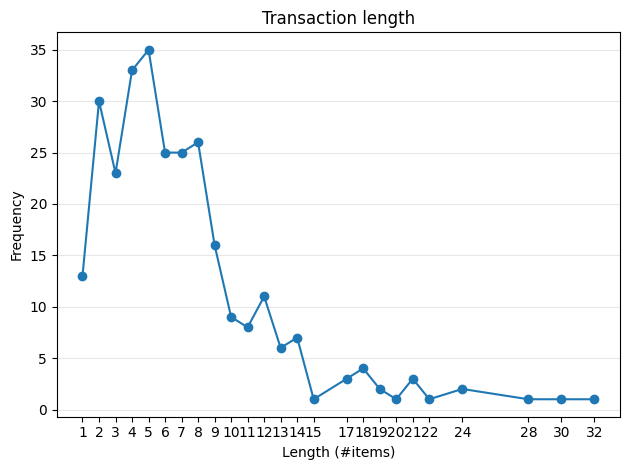

In [213]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neu.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 310
Number of items : 3001
Minimum Transaction Size : 1
Average Transaction Size : 18.919354838709676
Maximum Transaction Size : 212
Standard Deviation Transaction Size : 24.49917601451564
Variance in Transaction Sizes : 602.1520513623551
Sparsity : 0.9936956498371511


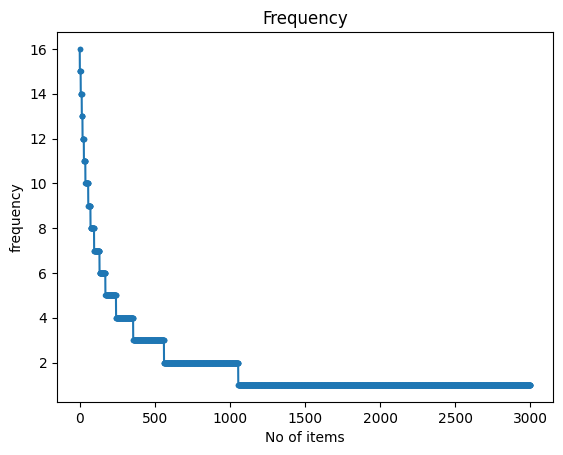

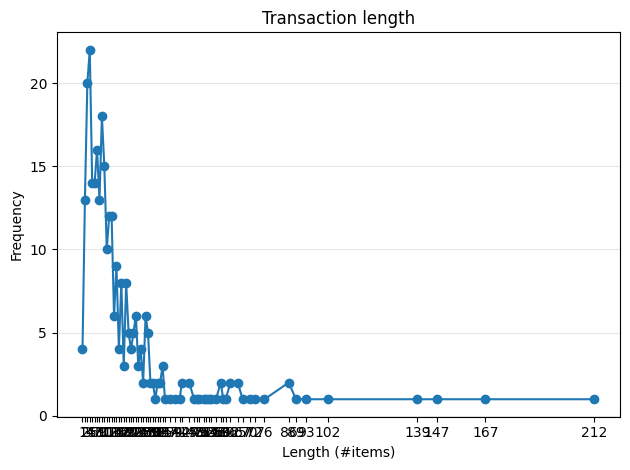

In [214]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_pos.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [215]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_neg.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_neg= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neg))) # print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 30
Runtime: 0.0012218952178955078


In [216]:
obj1.save('freq_patterns_neg_minSup9.txt') # save the patterns
frequentPatternsDF_neg

,Patterns,Support
0,shit,9
1,too,9
2,still,9
3,time,9
4,want,9
5,our,9
6,me,10
7,why,10
8,out,10
9,go,10


In [217]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_neu.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_neu= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neu))) # print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 17
Runtime: 0.0010540485382080078


In [218]:
obj1.save('freq_patterns_neu_minSup9.txt') #save the patterns
frequentPatternsDF_neu

,Patterns,Support
0,day,9
1,like,9
2,any,9
3,should,9
4,today,9
5,after,9
6,one,9
7,going,10
8,com,10
9,stockbuyvest,10


In [219]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_pos.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_pos= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_pos))) # print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 73
Runtime: 0.0034208297729492188


In [220]:
obj1.save('freq_patterns_pos_minSup9.txt') #save the patterns
frequentPatternsDF_pos

,Patterns,Support
0,does,9
1,already,9
2,american,9
3,year,9
4,companies,9
...,...,...
68,him,15
69,way,15
70,since,15
71,down,16


In [221]:
# We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_neg, frequentPatternsDF_neu, frequentPatternsDF_pos]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns  Support
91     over       16
90     down       16
89    since       15
88      way       15
87       ve       15
..      ...      ...
39      had        9
40     call        9
41    great        9
1      time        9
0      shit        9

[92 rows x 2 columns]
Number of patterns discarded: 28


In [222]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,which,point,doesn,lmao,love,had,call,great,time,shit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dimentionality Reduction

In [223]:
# Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

AttributeError: module 'umap' has no attribute 'UMAP'

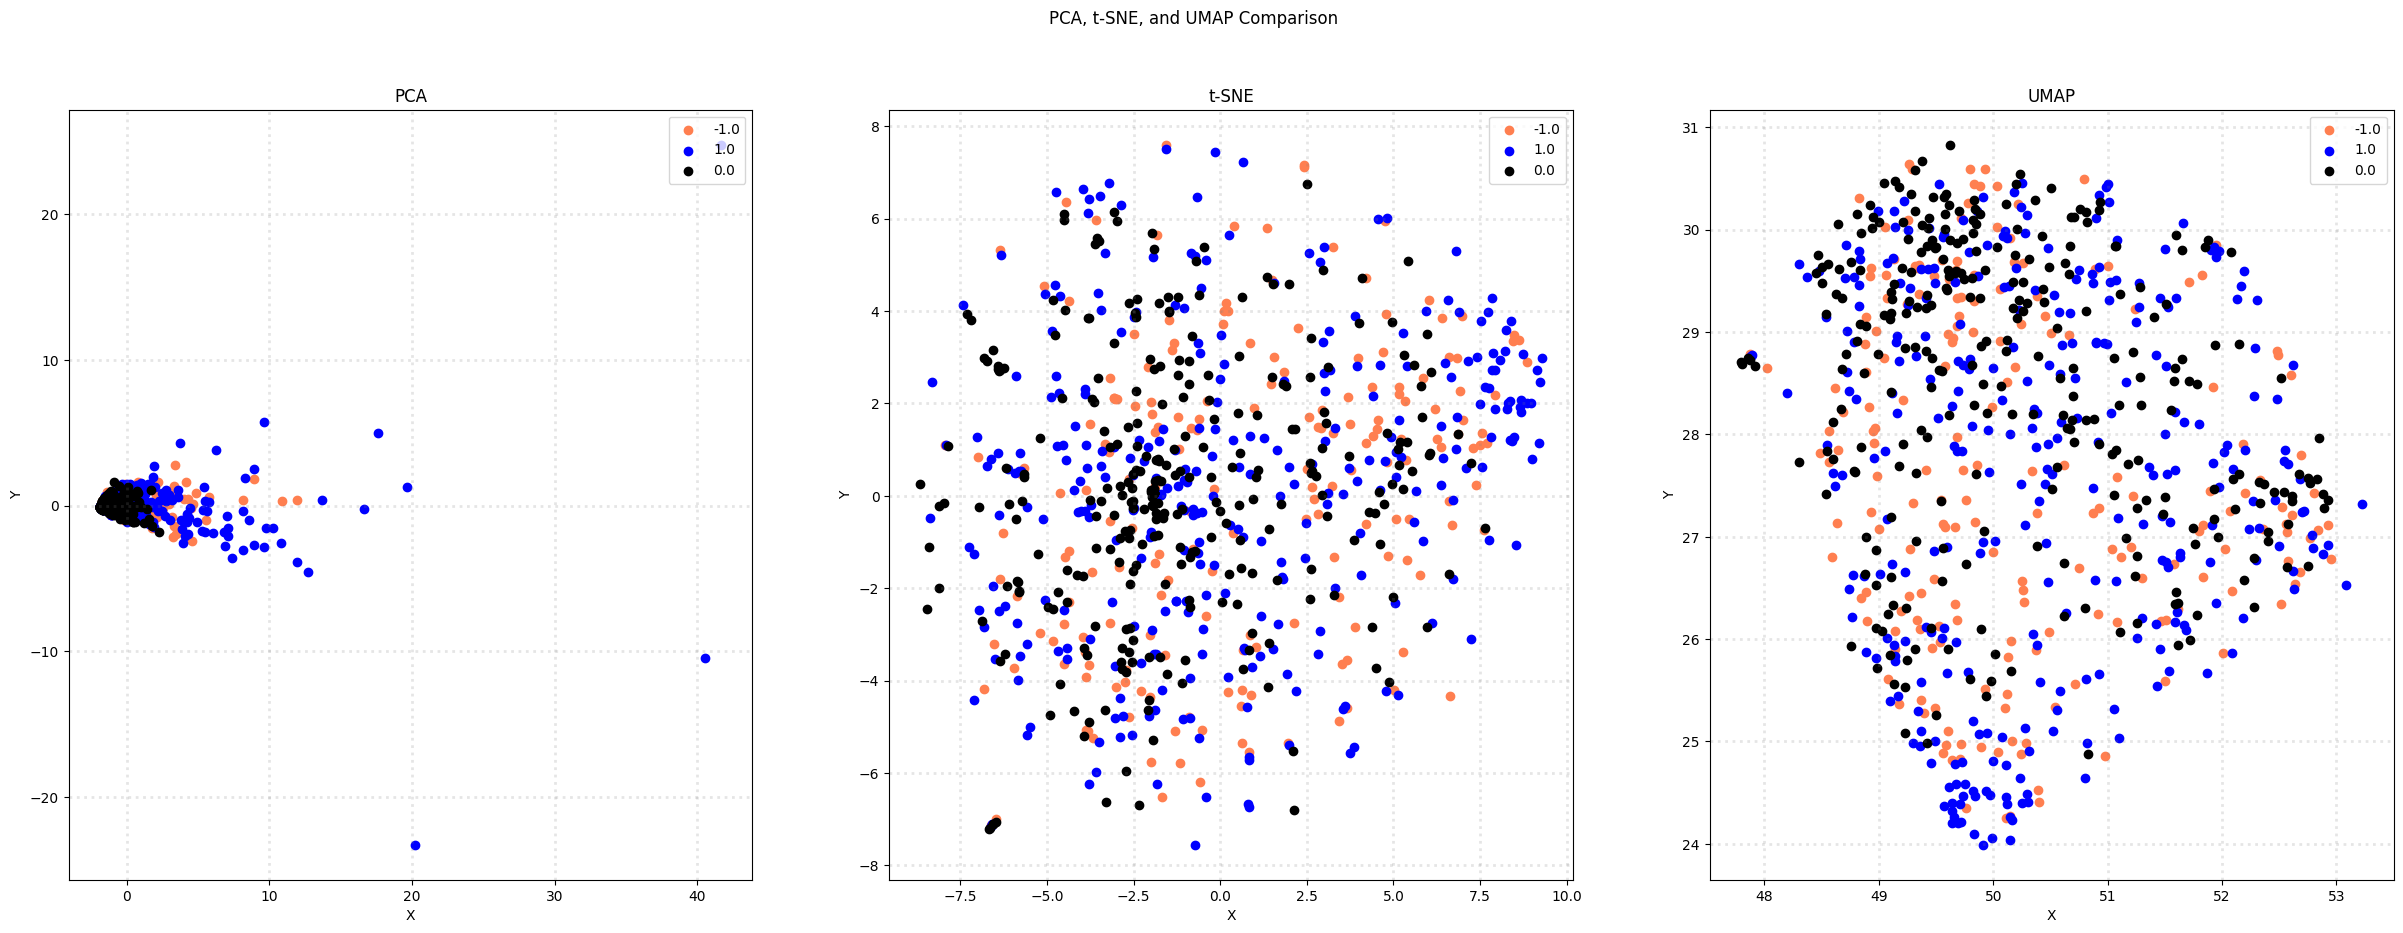

In [ ]:
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

#### Plot with Augmented Data

In [ ]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

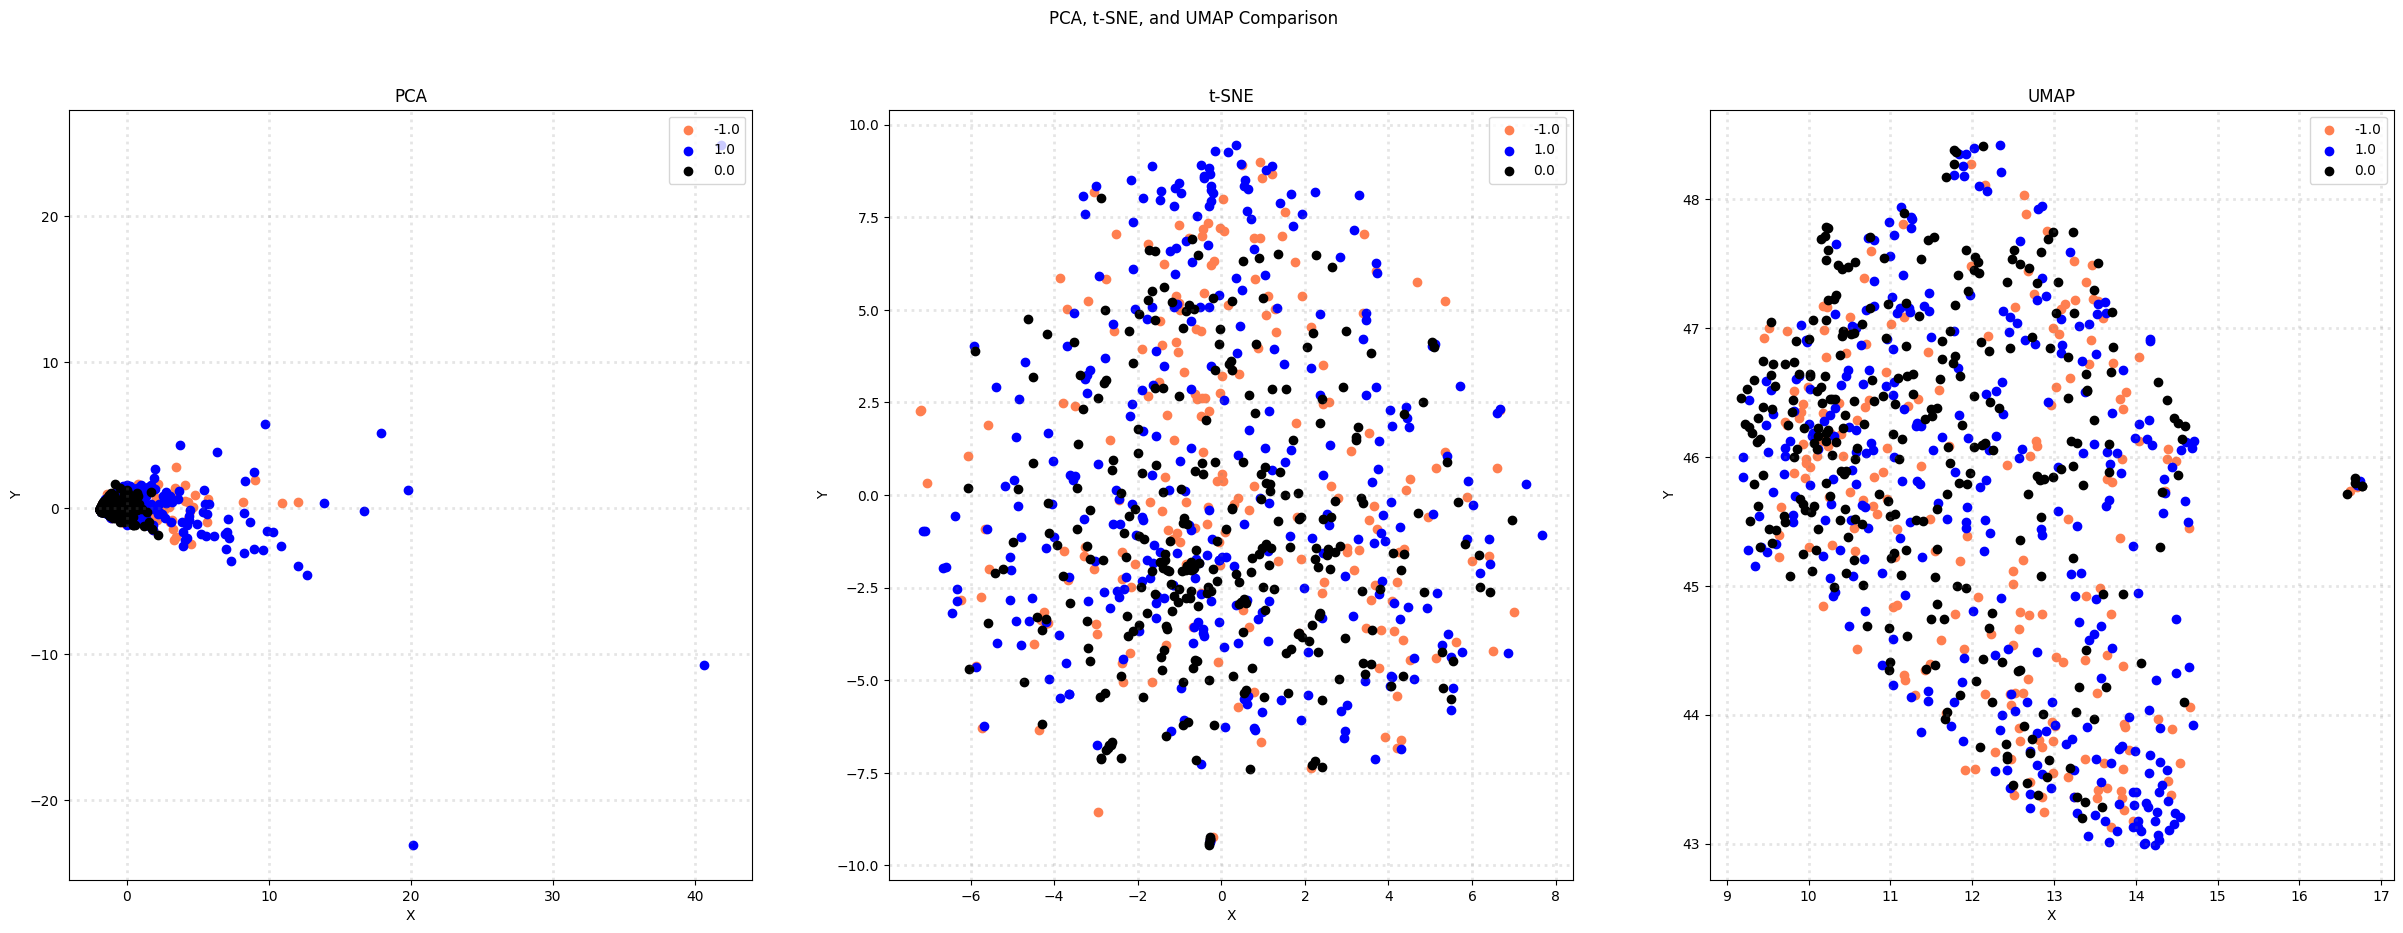

In [ ]:
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10)) 
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

#### Plot in 3D

In [ ]:
X_pca_aug_3d  = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

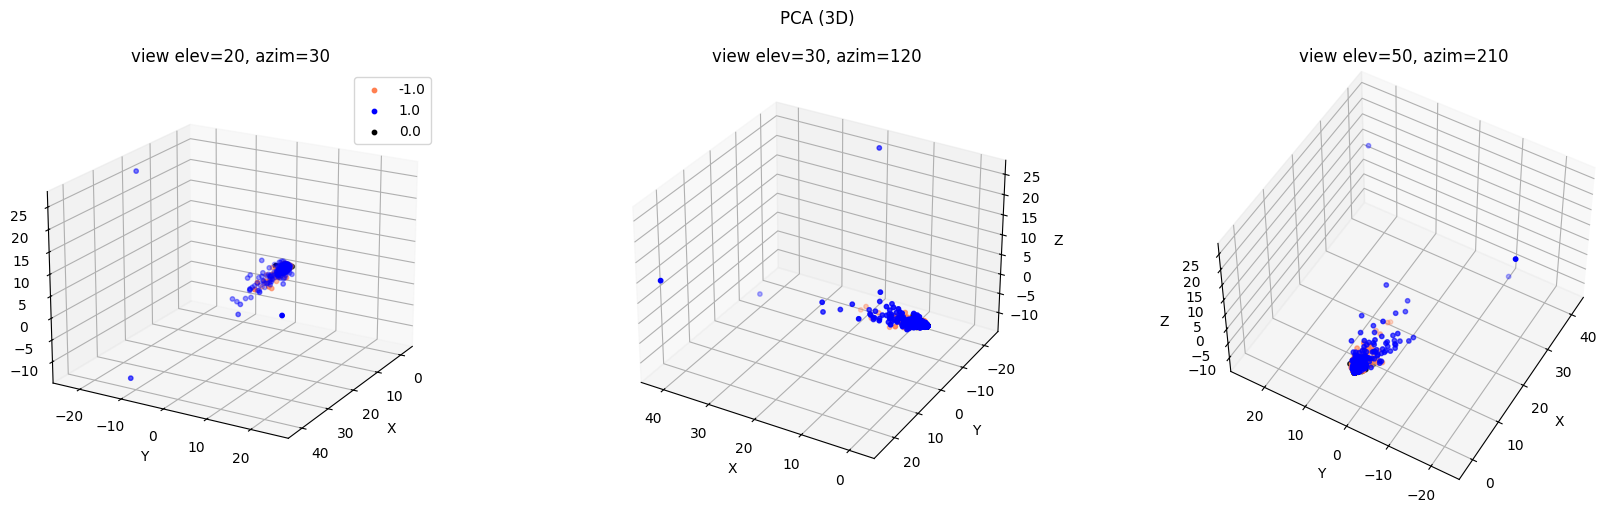

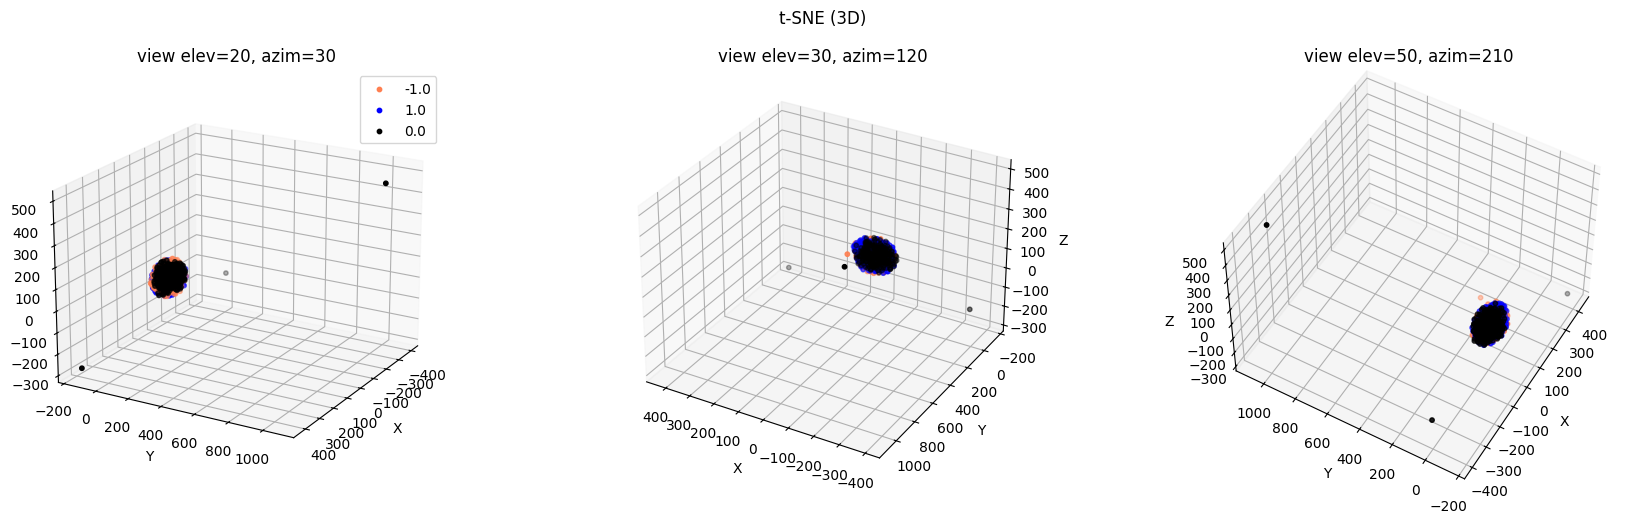

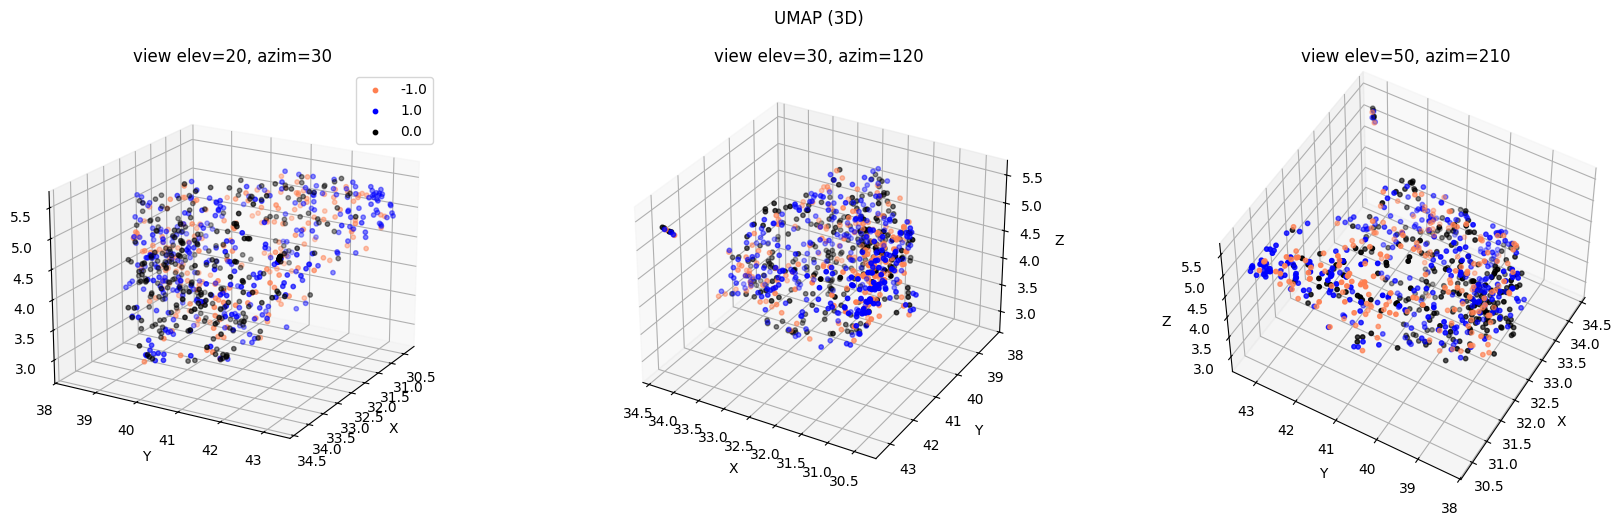

In [ ]:
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment'].unique() 

cat_to_idx = {cat: np.where(X['sentiment'].values == cat)[0] for cat in sentiments}

def scatter3d(ax, emb3d, title):
    for c, cat in zip(col, sentiments):
        idx = cat_to_idx[cat]
        ax.scatter(emb3d[idx, 0], emb3d[idx, 1], emb3d[idx, 2], c=c, s=10, label=cat)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# (elev, azim)
views = [(20, 30), (30, 120), (50, 210)]
for name, emb in [('PCA (3D)', X_pca_aug_3d),
                  ('t-SNE (3D)', X_tsne_aug_3d),
                  ('UMAP (3D)', X_umap_aug_3d)]:
    fig = plt.figure(figsize=(18, 5))
    fig.suptitle(name)
    for i, (elev, azim) in enumerate(views, start=1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        scatter3d(ax, emb, f'view elev={elev}, azim={azim}')
        ax.view_init(elev=elev, azim=azim)
        if i == 1:
            ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

### Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

LabelBinarizer()

In [ ]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()

In [ ]:
X[0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,...,polarity,sentiment,entities,label,polarity_class,text_len,unigrams,bigrams,tokenized_text,bin_sentiment
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,0.981406,...,-0.900000,-1.0,[],-1.0,-1,16,"[Calls, on, retards]","[(Calls, on), (on, retards)]","{retards, Calls, on}","[1, 0, 0]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,0.981406,...,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,1,137,"[Stunt, as, in, like, why, did, they, even, ma...","[(Stunt, as), (as, in), (in, like), (like, why...","{ever., about, starting, in, No, even, a, as, ...","[0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,0.0,0.981406,...,0.000000,0.0,['ticker'],0.0,0,33,"[Seeing, lots, of, red, in, the, ticker, .]","[(Seeing, lots), (lots, of), (of, red), (red, ...","{of, lots, red, in, the, ticker., Seeing}","[0, 1, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.980000,...,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,1,1067,"[Vision, Marine, Technologies, Inc., is, rewri...","[(Vision, Marine), (Marine, Technologies), (Te...","{collaboration, combined, pushes, limits, grou...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,0.0,0.981406,...,0.000000,0.0,[],-1.0,0,24,"[He, didn, ’, t, say, thank, you, .]","[(He, didn), (didn, ’), (’, t), (t, say), (say...","{He, say, you., thank, didn’t}","[0, 1, 0]"


### Data Exploration

In [ ]:
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

print(document_to_transform_1)
print(document_to_transform_2)

["It's a copy/paste from a Bloomberg terminal."]
['\n\n  [World Markets (stockbuyvest.com)]()']


In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_24438/4249942061.py:8: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_24438/4249942061.py:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/48/d9nsmmsd7zj56q7ny2grbyx40000gn/T/ipykernel_24438/4249942061.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



### Data Classification

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# 1) 先切資料（分層確保各類別比例一致）
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df_sample['text'], df_sample['sentiment'],
    test_size=0.3, random_state=42, stratify=df_sample['sentiment']
)

# 2) 只在「訓練集」fit 字典；之後一律 transform
vect = CountVectorizer()  # 或 TfidfVectorizer
X_train_counts = vect.fit_transform(X_train_text)
X_test_counts  = vect.transform(X_test_text)

# 3) 若要畫 heatmap（Sentiment × Top terms），
#    也要用「同一個字典」來統計（可以用整份資料 transform，但不能再 fit）
X_all_counts = vect.transform(df_sample['text'])
terms = vect.get_feature_names_out()

# 選前 K 高頻詞（用全體 counts 的總和決定，不要 per-class fit）
term_freq = np.asarray(X_all_counts.sum(axis=0)).ravel()
K = 20
top_idx = term_freq.argsort()[::-1][:K]
sel_terms = terms[top_idx]

# 4) 用同一個矩陣 + 類別標籤 groupby
mat_all = pd.DataFrame(X_all_counts[:, top_idx].toarray(), columns=sel_terms)
mat_all['sentiment'] = df_sample['sentiment'].astype(str).values
G1 = mat_all.groupby('sentiment')[sel_terms].sum()
G1_log = np.log1p(G1)

mat_all['subreddit'] = df_sample['subreddit'].astype(str).values
G2 = mat_all.groupby('subreddit')[sel_terms].sum()
G2_log = np.log1p(G2)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])
pipe.fit(X_train_text, y_train)
pipe.score(X_test_text, y_test)


In [ ]:
y = X['sentiment'].astype(float)

labels = np.array(sorted(y.unique()))       
label_map = { -1.0: "neg", 0.0: "neu", 1.0: "pos" }
target_names = [label_map[l] for l in labels]

X_train, X_test, y_train, y_test = train_test_split(tdm_df, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5104602510460251

Classification Report:
               precision    recall  f1-score   support

         neg     0.4286    0.3559    0.3889        59
         neu     0.7143    0.2874    0.4098        87
         pos     0.4903    0.8172    0.6129        93

    accuracy                         0.5105       239
   macro avg     0.5444    0.4868    0.4705       239
weighted avg     0.5566    0.5105    0.4837       239



Augmented Data

In [ ]:
#Answer
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

print("Accuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy: 0.4811715481171548

Classification Report:
               precision    recall  f1-score   support

         neg     0.4340    0.3833    0.4071        60
         neu     0.6667    0.2529    0.3667        87
         pos     0.4575    0.7609    0.5714        92

    accuracy                         0.4812       239
   macro avg     0.5194    0.4657    0.4484       239
weighted avg     0.5277    0.4812    0.4556       239

